# Install Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Load Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/BDA/MCI_2014_to_2017.csv')
df = pd.DataFrame(data)
print('The Original Data Size')
df.shape

The Original Data Size


(131073, 29)

# Data Pre-Processing and Cleaning

In [4]:
print('Original Data Size after dropping Duplicates')
df = df.drop_duplicates(subset='event_unique_id',keep='first')
df.shape

Original Data Size after dropping Duplicates


(113908, 29)

In [42]:
#Drop Unwanted Columns
drop_colmns = ['X', 'Y', 'Index_', 'reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
               'reporteddayofweek', 'reportedhour', 'Hood_ID', 'FID', 'ucr_code', 'ucr_ext', 'Division', 'occurrencedayofyear']
df_dropped = df.drop(columns=drop_colmns)
print(df_dropped.columns)
print(set(df.columns) - set(df_dropped.columns))

Index(['event_unique_id', 'occurrencedate', 'premisetype', 'offence',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Neighbourhood', 'Lat',
       'Long'],
      dtype='object')
{'reportedday', 'X', 'reporteddate', 'Hood_ID', 'Division', 'Index_', 'reporteddayofyear', 'occurrencedayofyear', 'ucr_ext', 'reportedhour', 'reportedyear', 'ucr_code', 'reportedmonth', 'Y', 'reporteddayofweek', 'FID'}


In [6]:
#Group by Year
df_grouped = df_dropped.groupby(df_dropped['occurrenceyear'])

In [7]:
#Analysis by year
df_2015 = df_grouped.get_group(2015)
df_2016 = df_grouped.get_group(2016)
df_2017 = df_grouped.get_group(2017)

In [48]:
import pandas as pd
from sklearn.decomposition import PCA

# Assuming df_concatenated is your concatenated dataframe containing crime data

# Perform PCA on latitude and longitude columns
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_concatenated[['Lat', 'Long']])

# Add PCA features to dataframe
df_encoded['PCA1'] = pca_features[:, 0]
df_encoded['PCA2'] = pca_features[:, 1]

# Display the engineered features
print(df_encoded.head())


       MCI_Assault  MCI_Auto Theft  MCI_Break and Enter  MCI_Robbery  \
16007         True           False                False        False   
16008         True           False                False        False   
16009        False           False                 True        False   
16010         True           False                False        False   
16011        False           False                False         True   

       MCI_Theft Over      PCA1      PCA2  
16007           False  0.202363  0.039144  
16008           False -0.148116 -0.079626  
16009           False  0.149739  0.063124  
16010           False -0.146121 -0.033756  
16011           False -0.175478 -0.010539  


In [8]:
#Take only MCI
df_2015_grouped = df_2015.groupby(df_2015['MCI']).count()
df_2016_grouped = df_2016.groupby(df_2016['MCI']).count()
df_2017_grouped = df_2017.groupby(df_2017['MCI']).count()

In [9]:
#Plot by Crimes
plot = df_2015_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']


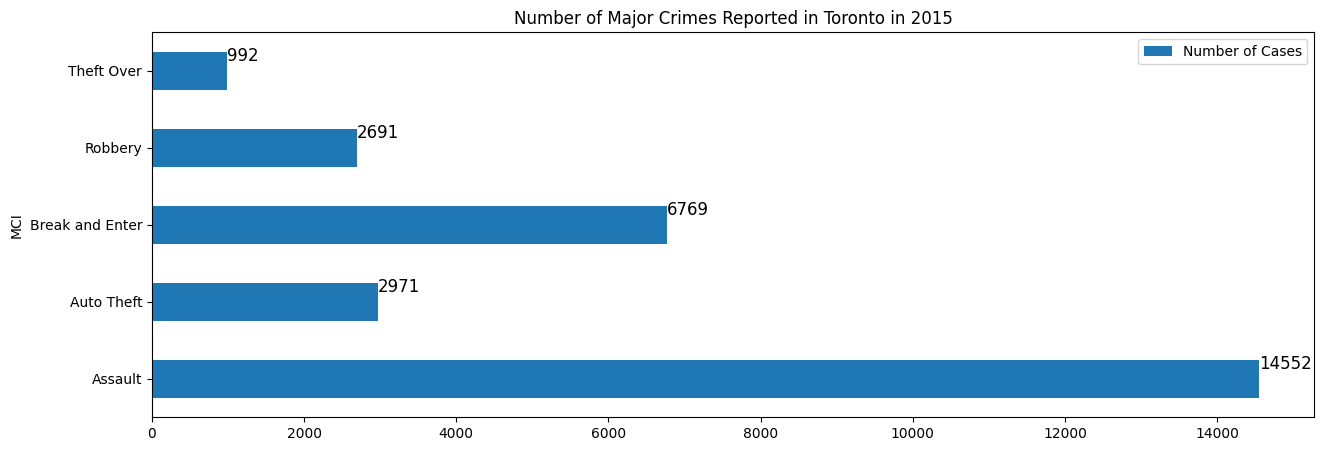

In [10]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2015')
for i in ax.patches:
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=12,color='black')

In [11]:
#Plot by Crimes
plot = df_2016_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']

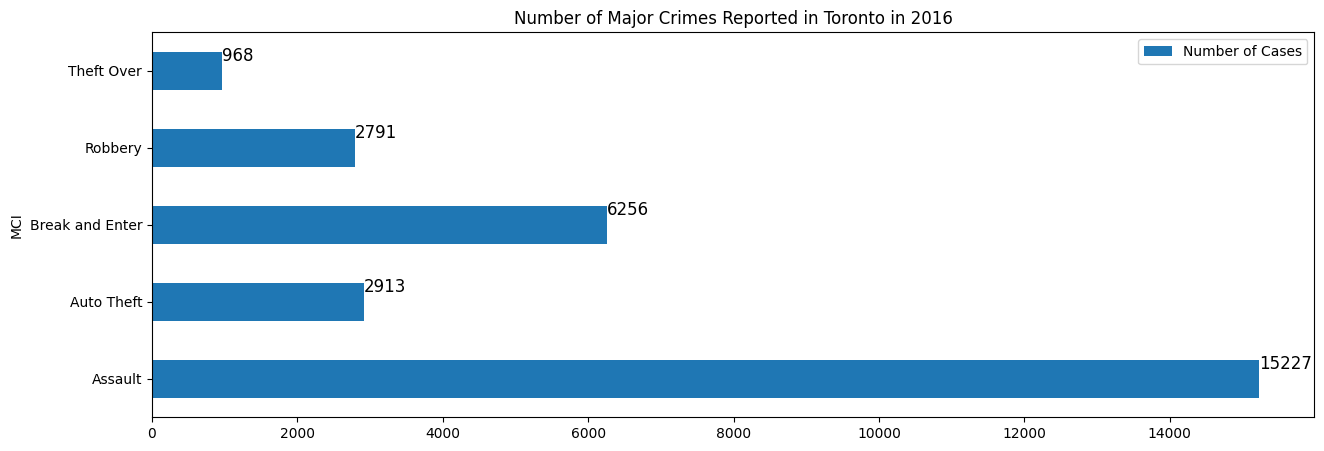

In [12]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2016')
for i in ax.patches:
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=12,color='black')


In [13]:
#Plot by Crimes
plot = df_2017_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']

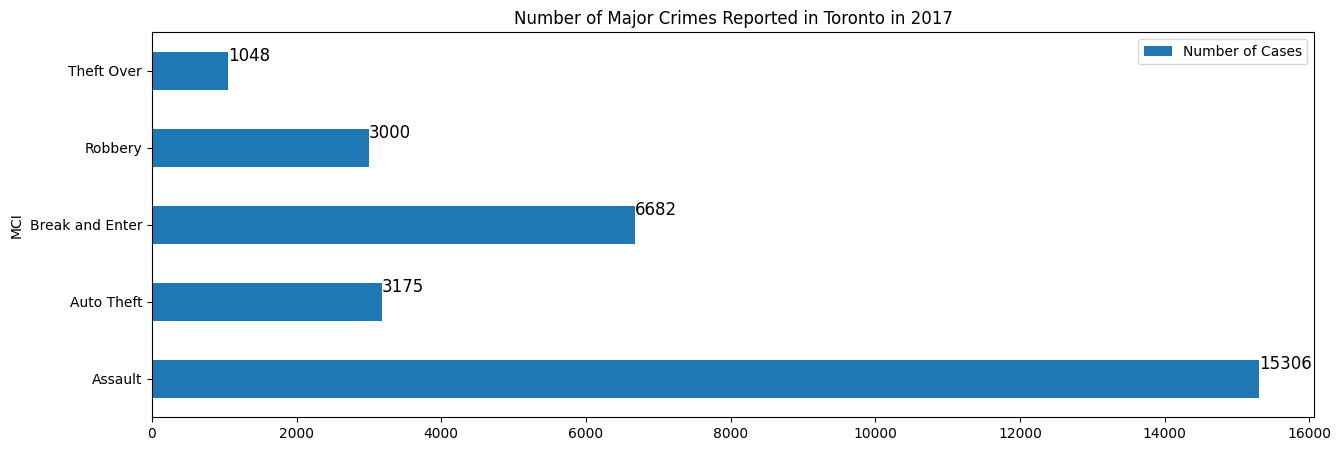

In [14]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2017')
for i in ax.patches:
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=12,color='black')

In [15]:
df_Assault_2015 = df_2015.loc[df_2015["MCI"] == "Assault"]
df_Assault_2015_grouped = df_Assault_2015.groupby(df_Assault_2015['offence']).count()
df_Assault_2016 = df_2016.loc[df_2016["MCI"] == "Assault"]
df_Assault_2016_grouped = df_Assault_2016.groupby(df_Assault_2016['offence']).count()
df_Assault_2017 = df_2017.loc[df_2017["MCI"] == "Assault"]
df_Assault_2017_grouped = df_Assault_2017.groupby(df_Assault_2017['offence']).count()


In [16]:
#Plot by Crimes
plot = df_Assault_2015_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Assualt Cases']



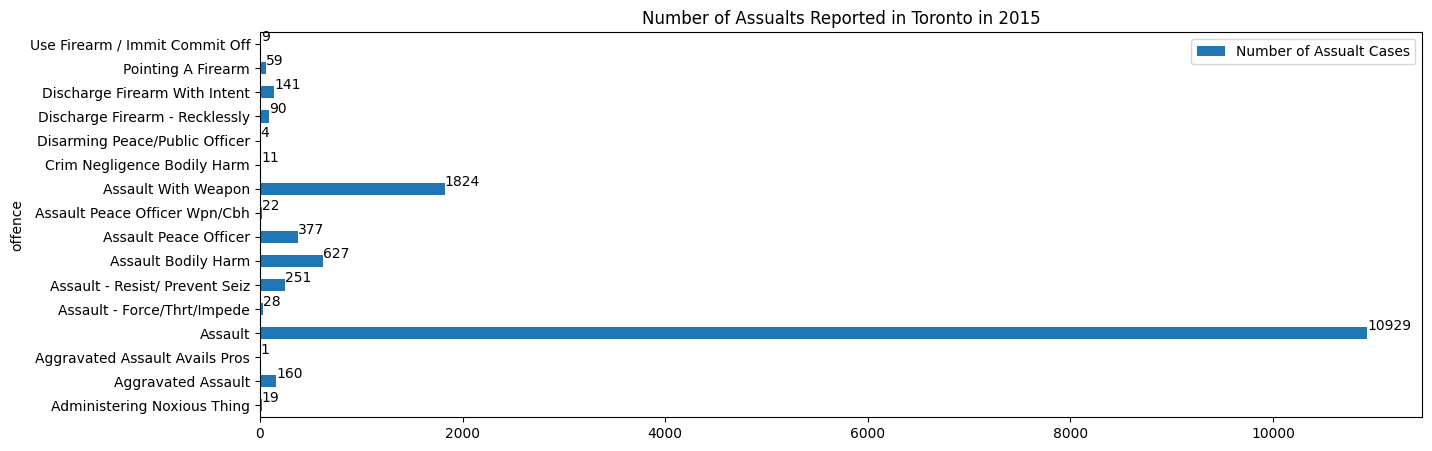

In [17]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Assualts Reported in Toronto in 2015')
for i in ax.patches:
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=10,color='black')

In [18]:
#Plot by Crimes
plot = df_Assault_2016_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Assualt Cases']


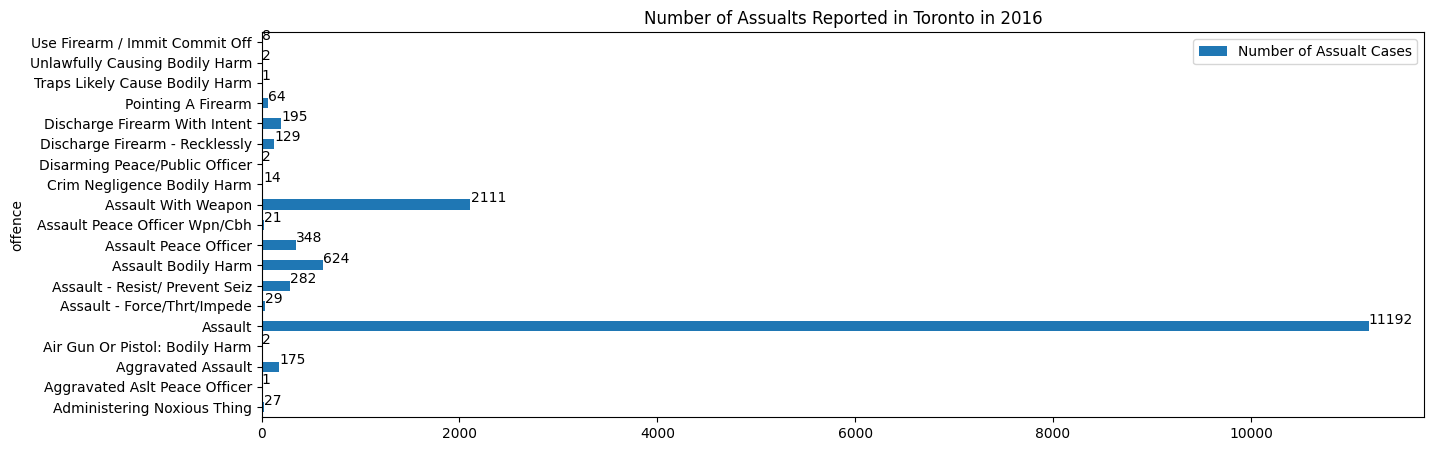

In [19]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Assualts Reported in Toronto in 2016')
for i in ax.patches:
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=10,color='black')

In [20]:
#Plot by Crimes
plot = df_Assault_2017_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Assualt Cases']


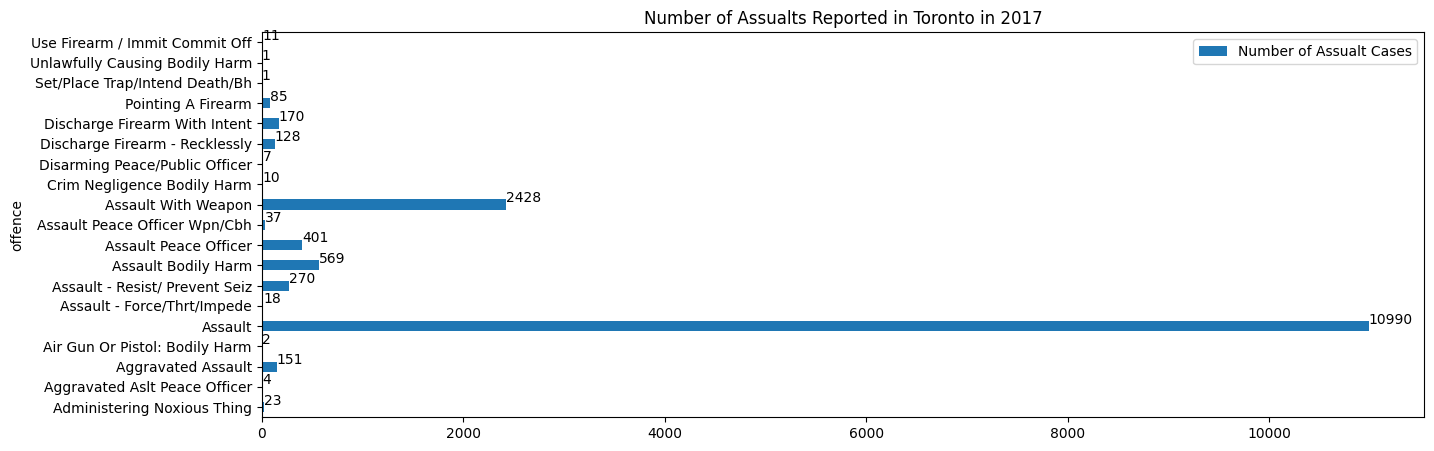

In [21]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Assualts Reported in Toronto in 2017')
for i in ax.patches:
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=10,color='black')

# K-MEANS CLUSTERING

In [22]:
df_g0 = df_2015.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g0 = df_g0.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g0 = df_g0.dropna()

df_g = df_2016.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g = df_g.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g = df_g.dropna()


df_g2 = df_2017.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g2 = df_g2.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g2 = df_g2.dropna()

In [23]:
df_g0.head(10)

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Neighbourhood,,,,,
Agincourt North (129),63.0,26.0,55.0,30.0,6.0
Agincourt South-Malvern West (128),83.0,26.0,61.0,19.0,9.0
Alderwood (20),37.0,16.0,26.0,6.0,4.0
Annex (95),245.0,14.0,127.0,44.0,26.0
Banbury-Don Mills (42),60.0,17.0,82.0,11.0,11.0
Bathurst Manor (34),48.0,27.0,44.0,8.0,7.0
Bay Street Corridor (76),382.0,18.0,117.0,30.0,23.0
Bayview Village (52),89.0,16.0,36.0,5.0,8.0
Bayview Woods-Steeles (49),37.0,7.0,33.0,1.0,1.0


In [24]:
neighborhoods0 = df_g0.index
neighborhoods0 = np.array(neighborhoods0)

neighborhoods = df_g.index
neighborhoods = np.array(neighborhoods)

neighborhoods2 = df_g2.index
neighborhoods2 = np.array(neighborhoods2)

In [25]:
scaler = StandardScaler()

In [ ]:
Sum_of_squared_distances0 = []
Sum_of_squared_distances = []
Sum_of_squared_distances2 = []

std_scale = scaler.fit(df_g0)
df_transformed0 = std_scale.transform(df_g0)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed0)
X0 = pca.transform(df_transformed0)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed0)
    Sum_of_squared_distances0.append(km.inertia_)


std_scale = scaler.fit(df_g)
df_transformed = std_scale.transform(df_g)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)


std_scale = scaler.fit(df_g2)
df_transformed2 = std_scale.transform(df_g2)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed2)
X1 = pca.transform(df_transformed2)

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed2)
    Sum_of_squared_distances2.append(km.inertia_)

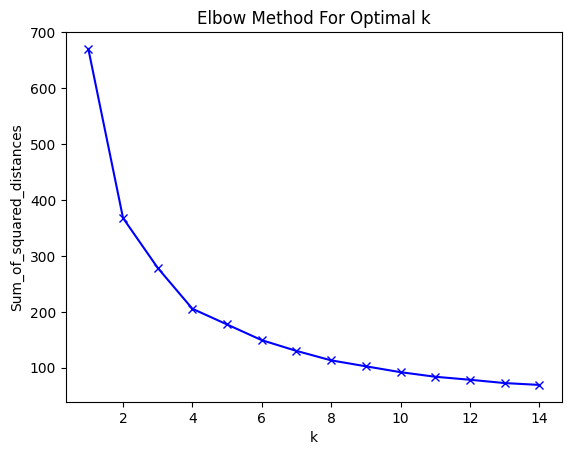

In [27]:
plt.plot(K, Sum_of_squared_distances0, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

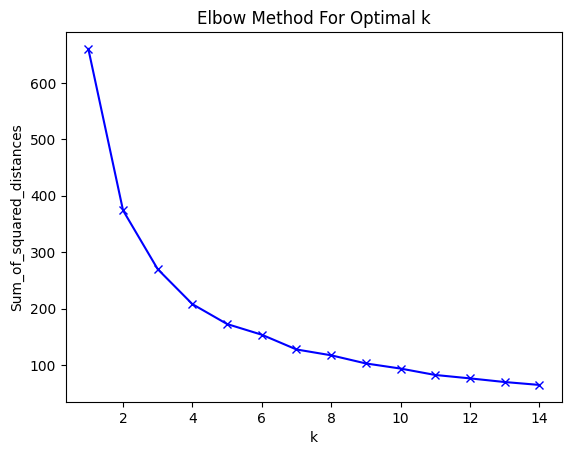

In [28]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

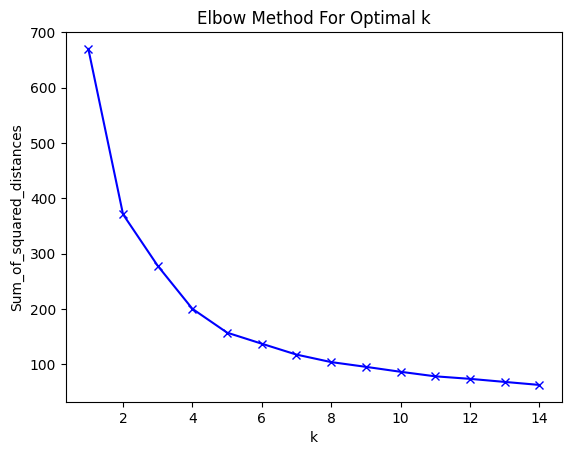

In [29]:
plt.plot(K, Sum_of_squared_distances2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
cov = np.cov(df_transformed0.T)
eig,eigvec = np.linalg.eig(cov)
eig.sort()
eig

array([0.12268223, 0.1800709 , 0.43885465, 0.87237409, 3.42361211])

In [31]:
cov = np.cov(df_transformed.T)
eig,eigvec = np.linalg.eig(cov)
eig.sort()
eig

array([0.10208788, 0.18977745, 0.4830462 , 0.77520119, 3.48805522])

In [32]:
cov = np.cov(df_transformed2.T)
eig,eigvec = np.linalg.eig(cov)
eig.sort()
eig

array([0.11238474, 0.18692746, 0.40340548, 0.84331117, 3.49156513])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6816266741800567


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5116027334959665


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4350690028065557


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.34221498299785413


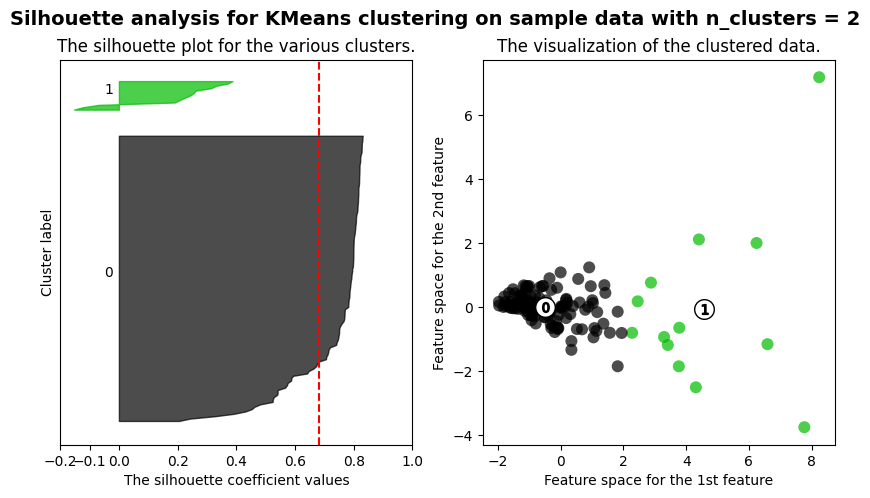

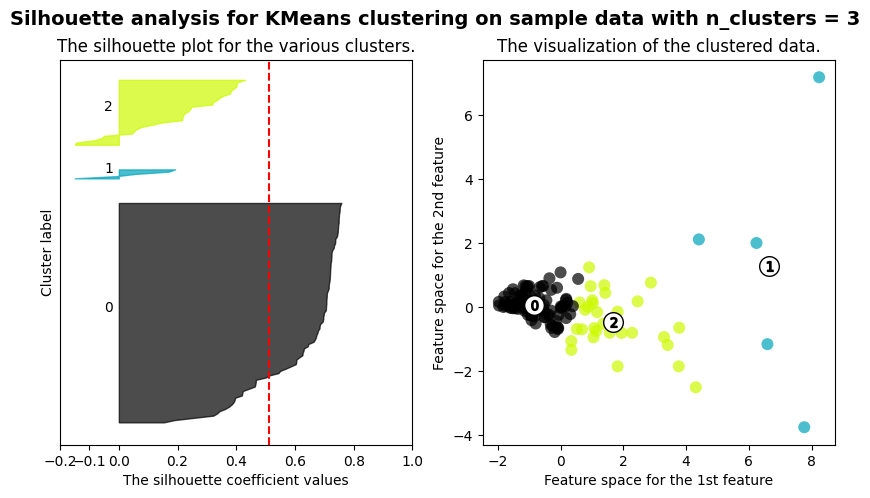

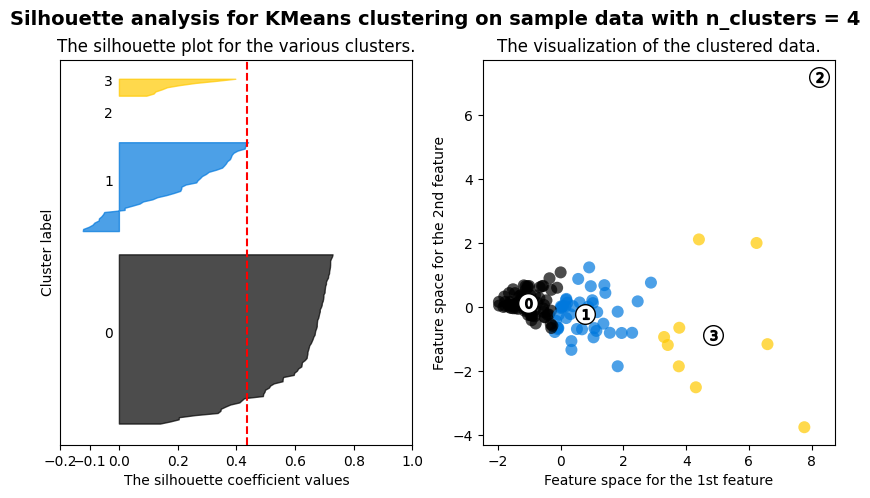

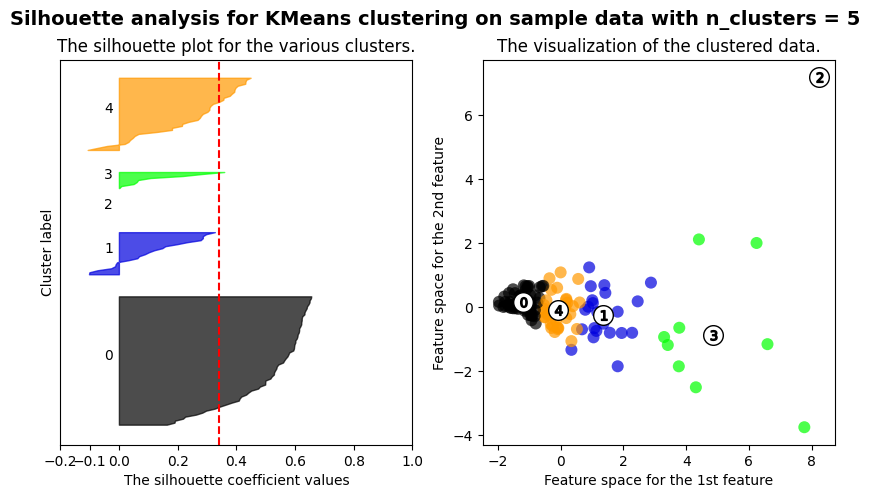

In [33]:
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters , random_state=3425)
    cluster_labels = kmeans.fit_predict(X0)
    silhouette_avg = silhouette_score(X0, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X0, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X0[:, 0], X0[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5870967414470056
For n_clusters = 3 The average silhouette_score is : 0.48471943551509794


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.49291941306767034
For n_clusters = 5 The average silhouette_score is : 0.4666433016924776


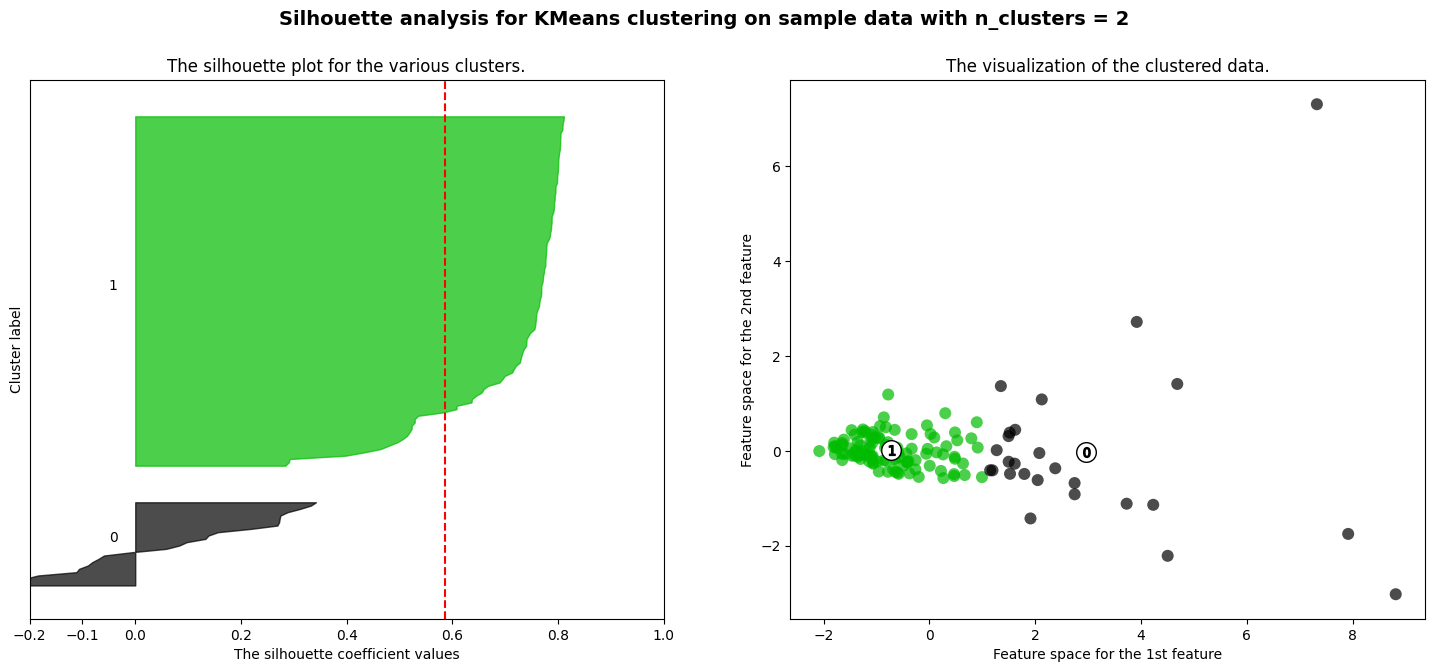

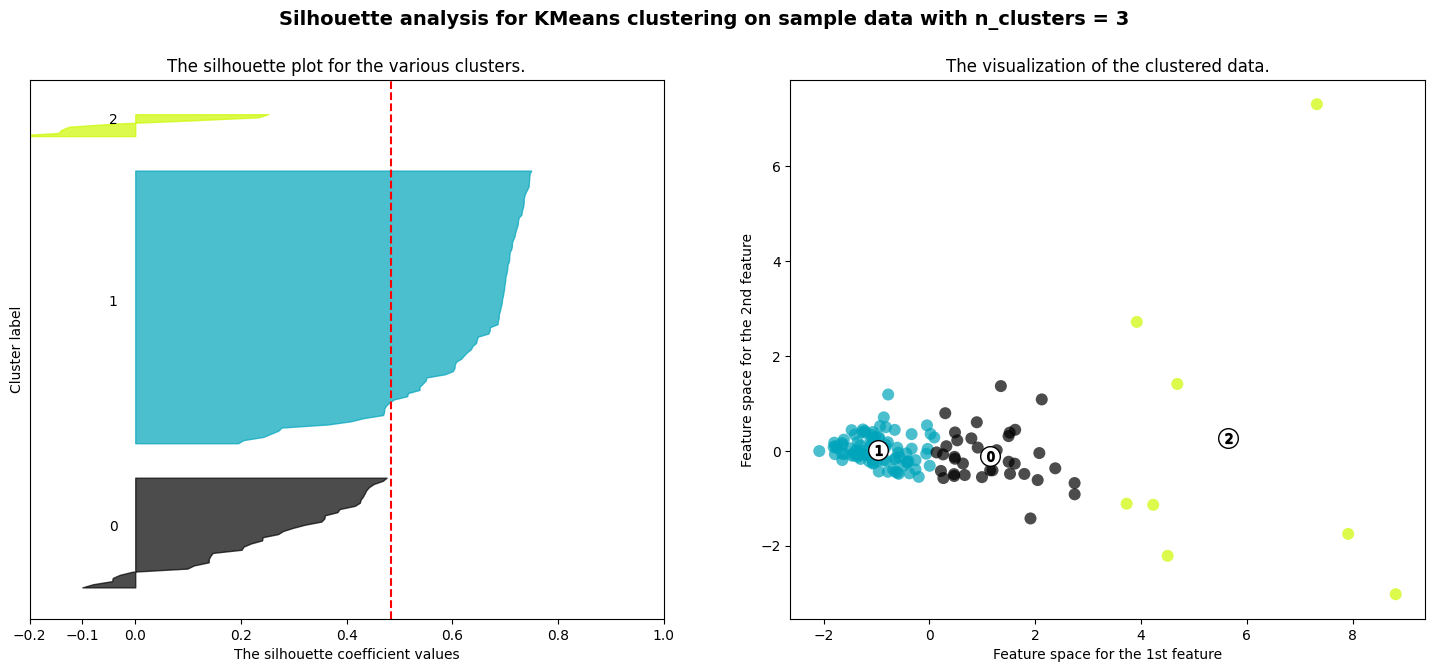

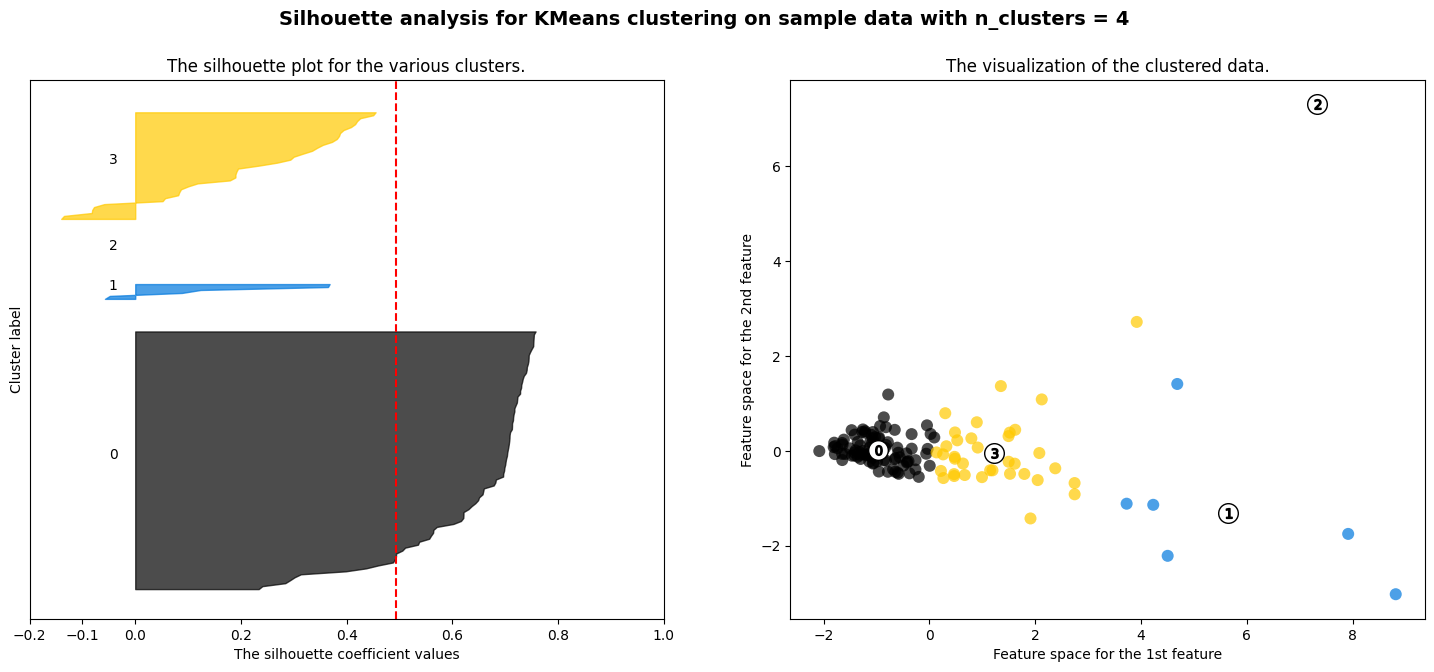

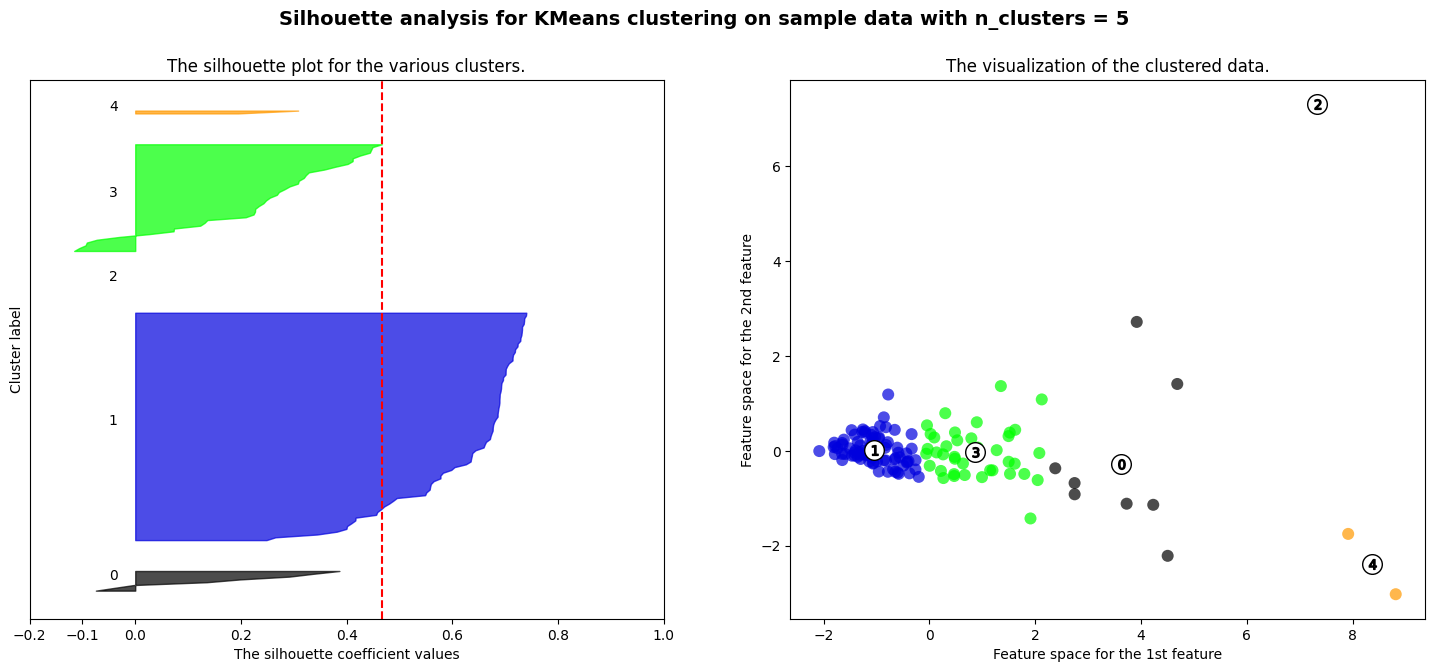

In [ ]:
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters , random_state=3425)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7031960008846129
For n_clusters = 3 The average silhouette_score is : 0.470075929377321


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4882028003182712
For n_clusters = 5 The average silhouette_score is : 0.4781240750814028


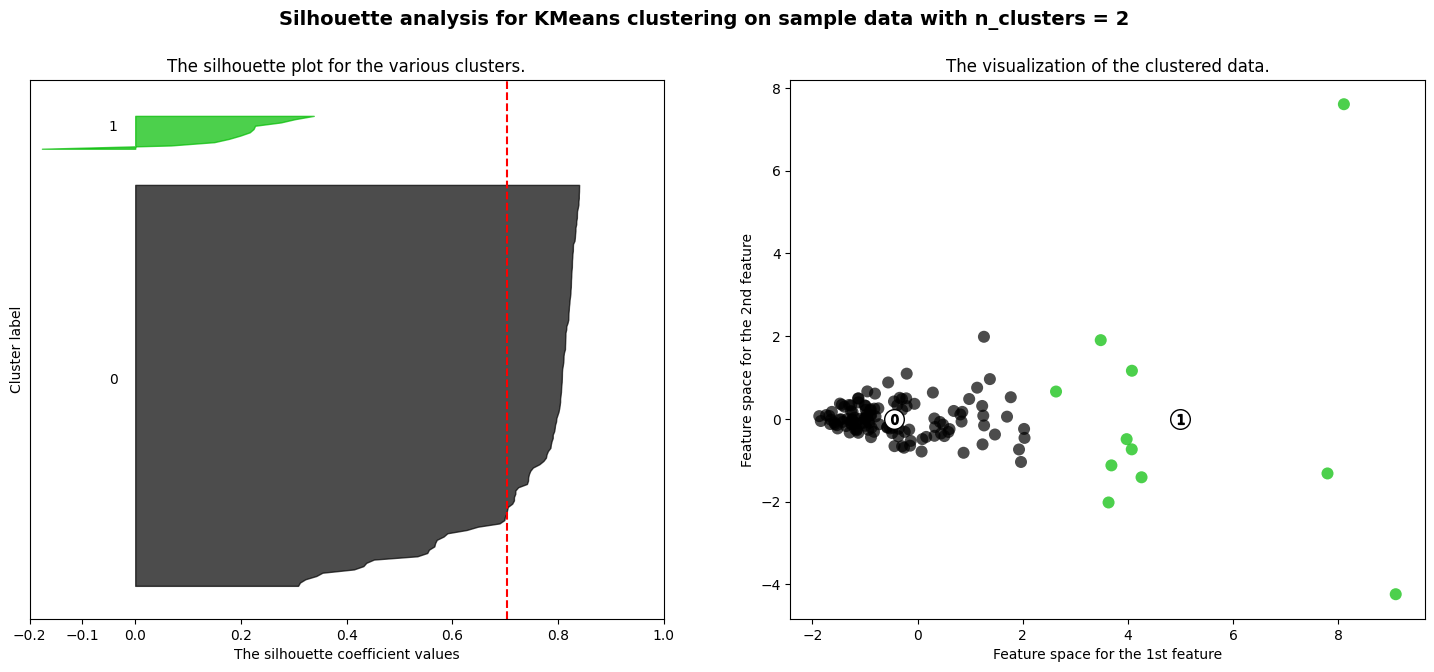

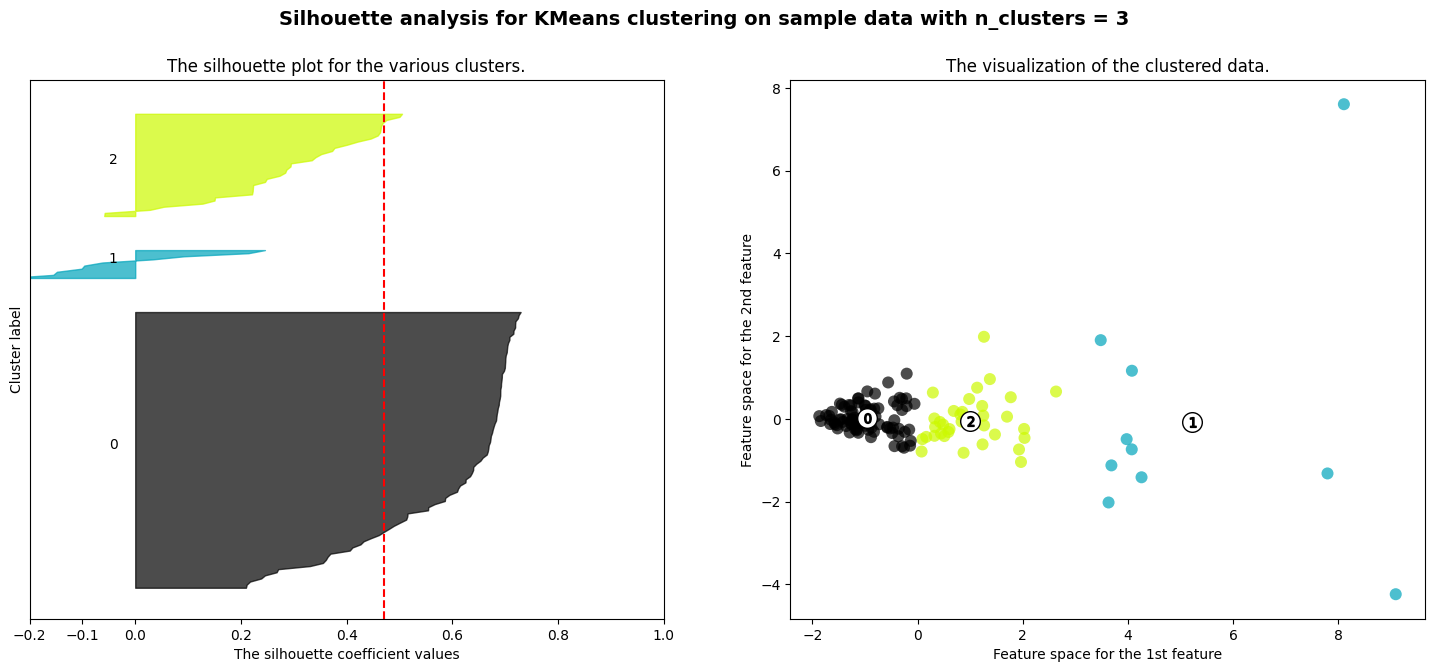

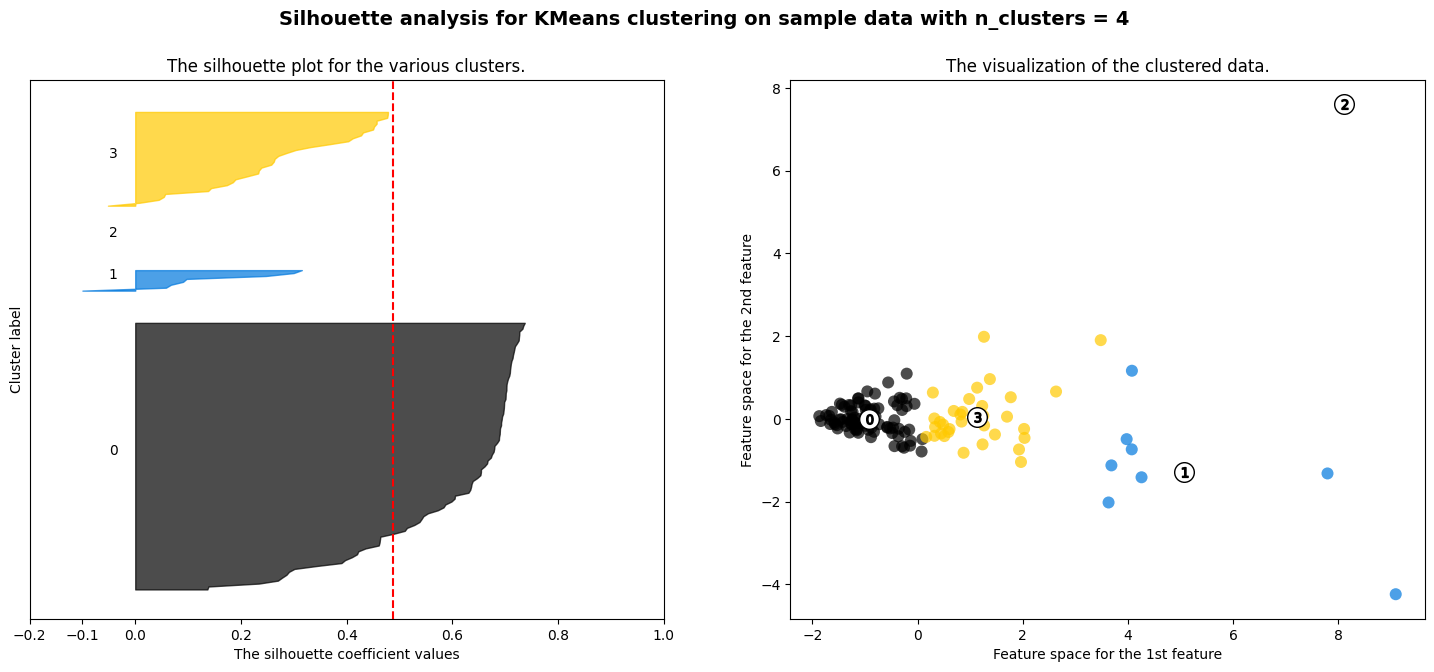

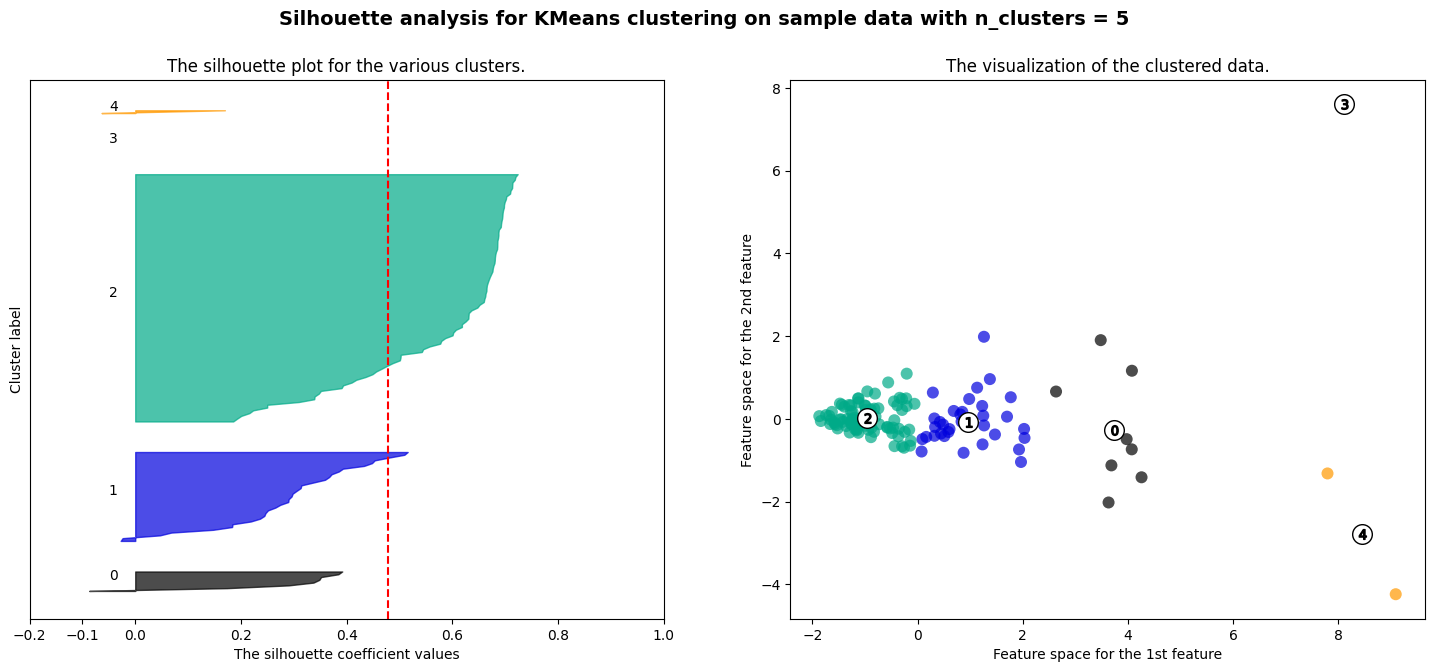

In [ ]:
for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters=n_clusters , random_state=3425)
    cluster_labels = kmeans.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])


    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1[:, 0], X1[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running time is : 0.02987998100002187


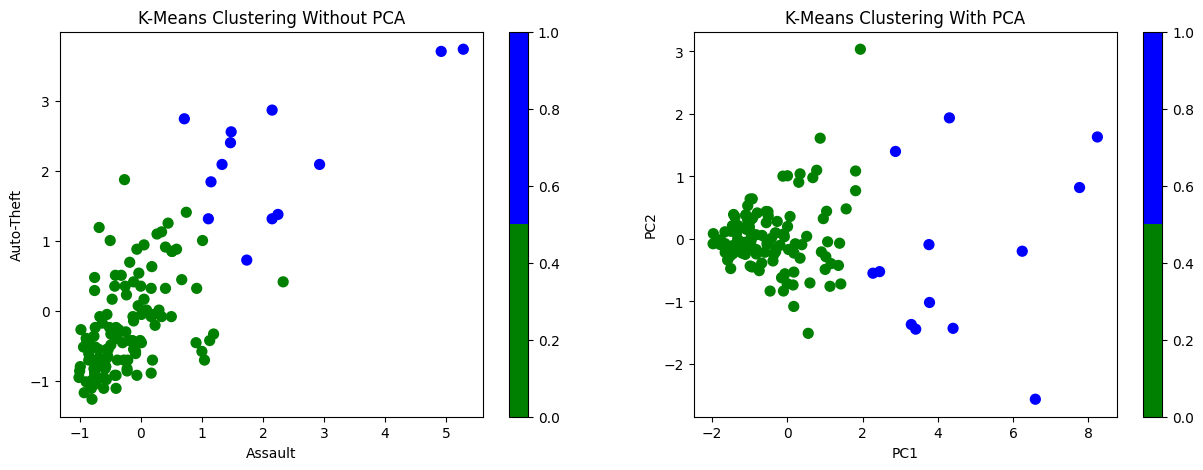

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running time is : 0.20491087900001048


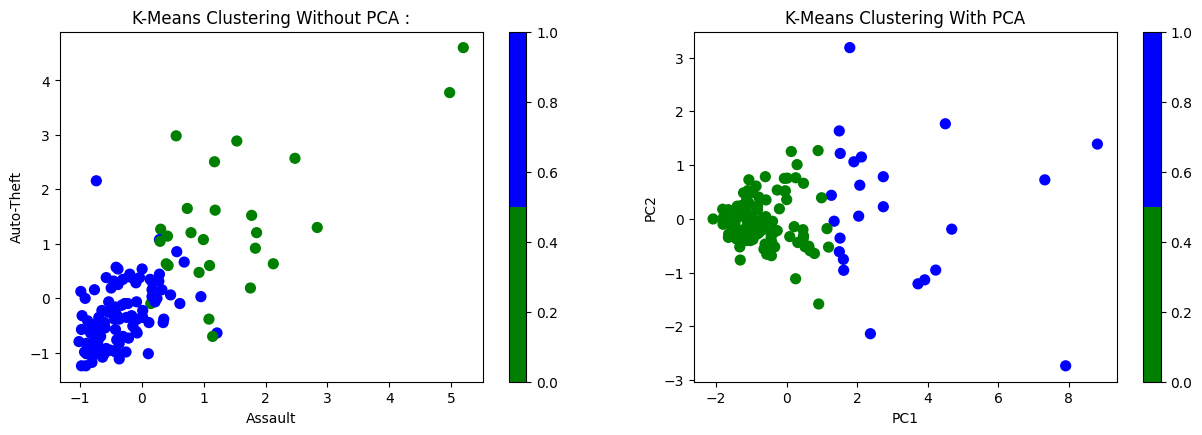

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


running time is : 0.055345808999959445


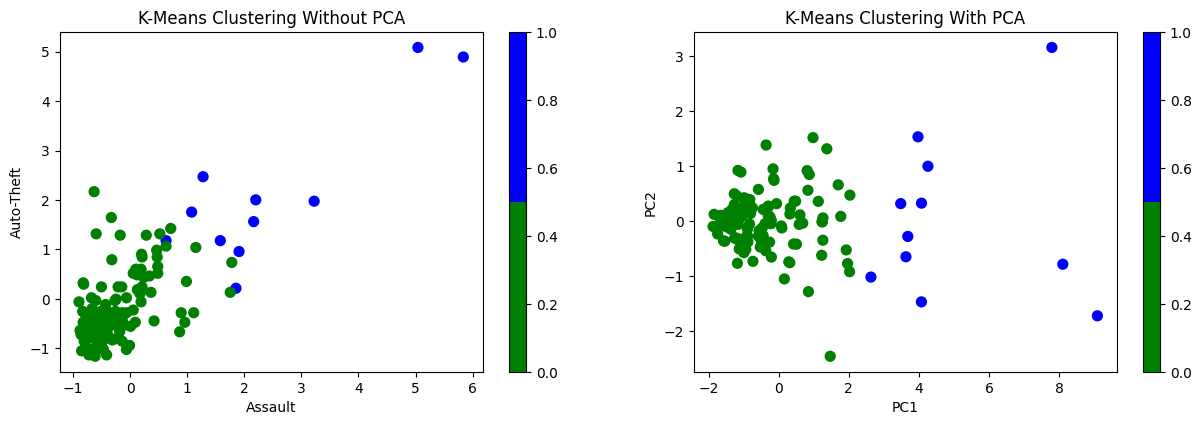

In [ ]:
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=3425)
colors = ['green','blue']


plt.figure(figsize=(15, 5))

ax = plt.subplot(121)
kc =kmeans.fit(df_transformed0)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed0)
# label = label.sort_values(by=0)
df_result['label']=label

scatter = plt.scatter(df_result[0],df_result[2],
                     c=list(label.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
kc =kmeans.fit(X0)
stop = timeit.default_timer()
klabel0 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X0)
# klabel0 = klabel0.sort_values(by=0)
df_result['label']=klabel0
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel0.iloc[:,0]), cmap=matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


colors = ['green','blue']
#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)
plt.figure(figsize=(15, 10))

ax = plt.subplot(221)

kc =kmeans.fit(df_transformed)

label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                       c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA :')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)

ax = plt.subplot(222)
start = timeit.default_timer()
kc =kmeans.fit(X)
stop = timeit.default_timer()
klabel1 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X)
klabel1.sort_values(by=0)
df_result['label']=klabel1
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel1.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


#Plotting the cluster obtained using GMM
kmeans = KMeans(n_clusters=2,random_state=342)

plt.figure(figsize=(15, 15))
ax = plt.subplot(321)
kc =kmeans.fit(df_transformed2)
label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(df_transformed2)
label.sort_values(by=0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(label.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)

ax = plt.subplot(322)
start = timeit.default_timer()
kc =kmeans.fit(X1)
stop = timeit.default_timer()
klabel2 = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X1)
klabel2.sort_values(by=0)
df_result['label']=klabel2
scatter = plt.scatter(df_result[0],df_result[2],
                      c = list(klabel2.iloc[:,0]), cmap= matplotlib.colors.ListedColormap(colors),s=50)
plt.title('K-Means Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()

In [ ]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]
for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = KMeans(n_clusters=2,random_state=3425).fit(i)
    labels = clustering.labels_
    print("Silhouette score(K-means) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

Silhouette score(K-means) for year 2015 is 0.6816266741800567
Silhouette score(K-means) for year 2016 is 0.5870967414470056
Silhouette score(K-means) for year 2017 is 0.7031960008846129


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Display Neighboorhoods
print('Crime Neighborhoods by K-Means in 2015')
print(neighborhoods0[np.where(klabel0[0]==1)])
kviolent15 = neighborhoods0[np.where(klabel0[0]==1)]
kviolent15s = neighborhoods0[np.where(klabel0[0]==0)]
kviolent15m = neighborhoods0[np.where(klabel0[0]==2)]

print('Crime Neighborhoods by K-Means in 2016')
print(neighborhoods[np.where(klabel1[0]==1)])
kviolent16 = neighborhoods[np.where(klabel1[0]==1)]
kviolent16s = neighborhoods[np.where(klabel1[0]==0)]
kviolent16m = neighborhoods[np.where(klabel1[0]==2)]


print('Crime Neighborhoods by K-Means in 2017')
print(neighborhoods2[np.where(klabel2[0]==1)])
kviolent17 = neighborhoods2[np.where(klabel2[0]==1)]
kviolent17s = neighborhoods2[np.where(klabel2[0]==0)]
kviolent17m = neighborhoods2[np.where(klabel2[0]==2)]

Crime Neighborhoods by K-Means in 2015
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Clairlea-Birchmount (120)' 'Downsview-Roding-CFB (26)'
 'Islington-City Centre West (14)' 'Kensington-Chinatown (78)'
 'Moss Park (73)' 'Waterfront Communities-The Island (77)'
 'West Humber-Clairville (1)' 'Wexford/Maryvale (119)' 'Woburn (137)'
 'York University Heights (27)']
Crime Neighborhoods by K-Means in 2016
['Annex (95)' 'Bay Street Corridor (76)' 'Bendale (127)'
 'Church-Yonge Corridor (75)' 'Clairlea-Birchmount (120)'
 'Dorset Park (126)' 'Dovercourt-Wallace Emerson-Junction (93)'
 'Downsview-Roding-CFB (26)' 'Glenfield-Jane Heights (25)'
 'Humber Summit (21)' 'Islington-City Centre West (14)'
 'Kensington-Chinatown (78)' 'Malvern (132)' 'Moss Park (73)'
 'Mount Olive-Silverstone-Jamestown (2)' 'South Riverdale (70)'
 'Waterfront Communities-The Island (77)' 'West Hill (136)'
 'West Humber-Clairville (1)' 'Wexford/Maryvale (119)'
 'Willowdale East (51)' 'Woburn (13

In [ ]:
len(kviolent17s)

123

# DB SCAN

In [ ]:
from sklearn.cluster import DBSCAN

running time is : 0.002128270000014254


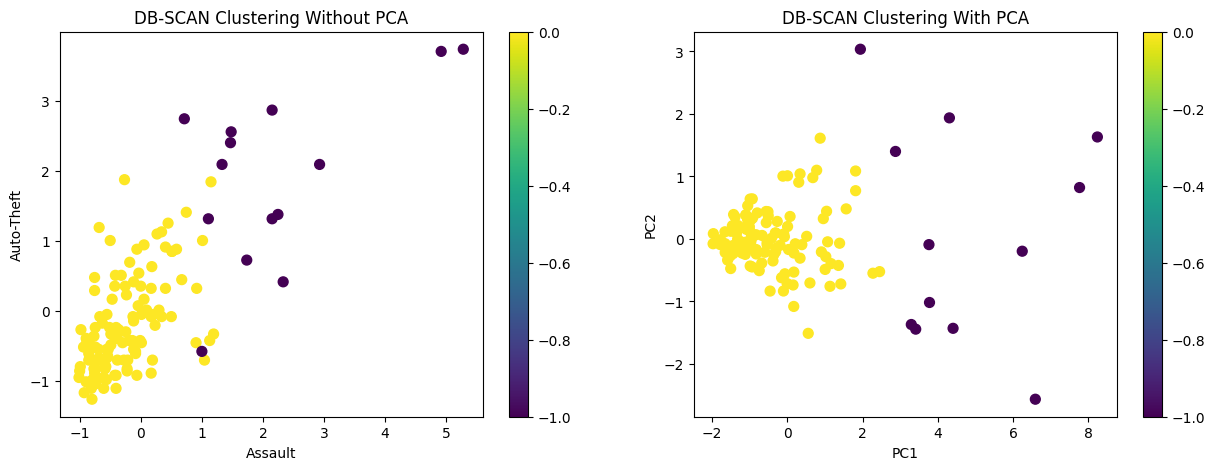

running time is : 0.0020123670000202765


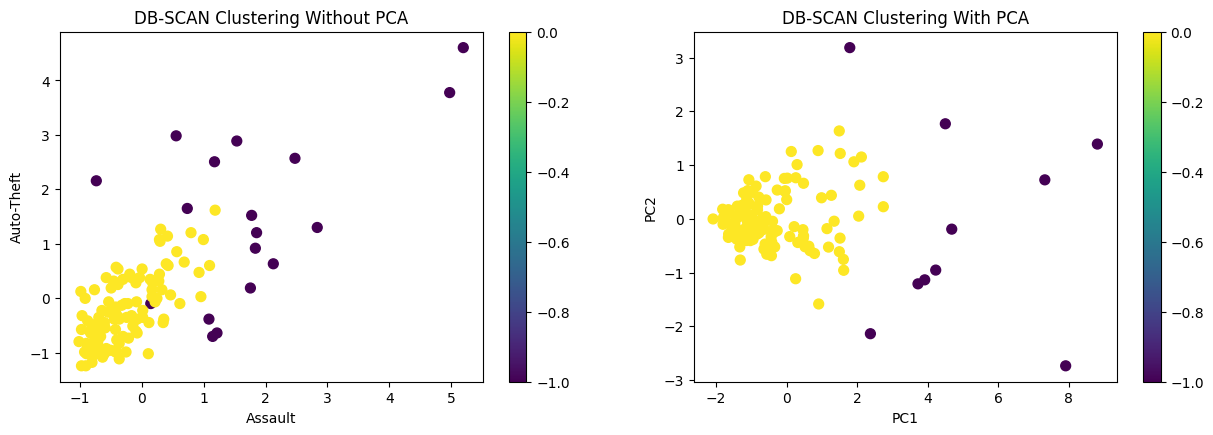

running time is : 0.002057261999993898


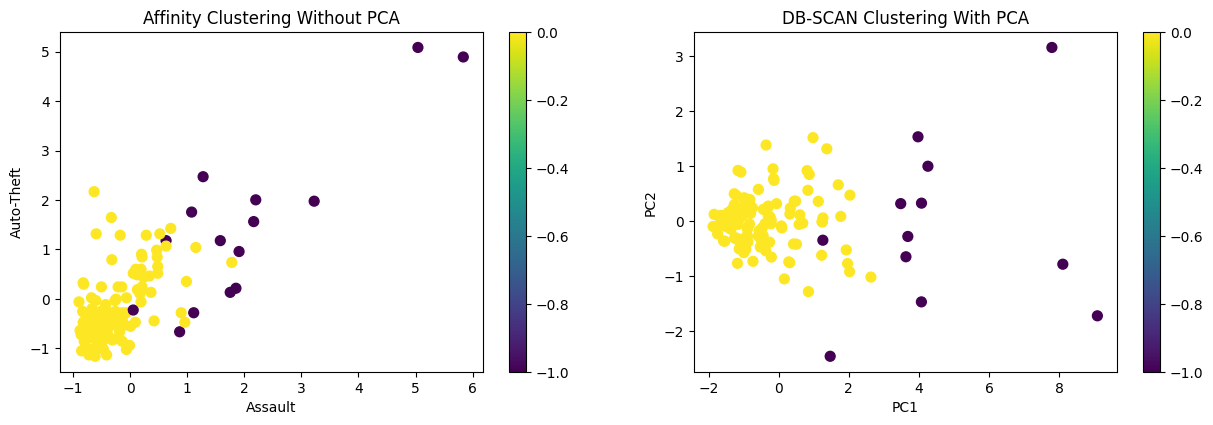

In [ ]:
#Density-Based Spatial Clustering of Applications with Noise
#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 5))

ax = plt.subplot(121)
clustering = DBSCAN(eps=1.2, min_samples=4).fit(df_transformed0)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('DB-SCAN Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
clustering = DBSCAN(eps=1.2, min_samples=4).fit(X0)
stop = timeit.default_timer()
label0 = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X0)
df_result['label']=label0
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label0[0],s=50)
plt.title('DB-SCAN Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()



#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 10))
ax = plt.subplot(221)
clustering = DBSCAN(eps=1.2, min_samples=4).fit(df_transformed)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('DB-SCAN Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(222)
start = timeit.default_timer()
clustering = DBSCAN(eps=1.2, min_samples=4).fit(X)
stop = timeit.default_timer()
label1 = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X)
df_result['label']=label1
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label1[0],s=50)
plt.title('DB-SCAN Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 15))
ax = plt.subplot(321)
clustering = DBSCAN(eps=1.2, min_samples=4).fit(df_transformed2)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed2)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('Affinity Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(322)
start = timeit.default_timer()
clustering = DBSCAN(eps=1.2, min_samples=4).fit(X1)
stop = timeit.default_timer()
label2 = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X1)
df_result['label']=label2
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label2[0],s=50)
plt.title('DB-SCAN Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()

**DBSCAN Silhouette**

In [ ]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]
for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = DBSCAN(eps=1.2, min_samples=4).fit(i)
    labels = clustering.labels_
    print("Silhouette score(DBSCAN) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

Silhouette score(DBSCAN) for year 2015 is 0.6915928867438386
Silhouette score(DBSCAN) for year 2016 is 0.693122355490269
Silhouette score(DBSCAN) for year 2017 is 0.6832320178079065


In [ ]:
#Display Neighboorhoods
print('Crime Neighborhoods by DBSCAN in 2015')
print(neighborhoods0[np.where(label0[0]==-1)])

print('Crime Neighborhoods by DBSCAN in 2016')
print(neighborhoods[np.where(label1[0]==-1)])


print('Crime Neighborhoods by DBSCAN in 2017')
print(neighborhoods2[np.where(label2[0]==-1)])

Crime Neighborhoods by DBSCAN in 2015
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Downsview-Roding-CFB (26)' 'Islington-City Centre West (14)'
 'Kensington-Chinatown (78)' 'Moss Park (73)'
 'Mount Olive-Silverstone-Jamestown (2)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']
Crime Neighborhoods by DBSCAN in 2016
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Moss Park (73)'
 'Mount Olive-Silverstone-Jamestown (2)' 'South Riverdale (70)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'York University Heights (27)']
Crime Neighborhoods by DBSCAN in 2017
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Humber Summit (21)' 'Islington-City Centre West (14)'
 'Kensington-Chinatown (78)' 'Moss Park (73)'
 'Mount Olive-Silverstone-Jamestown (2)'
 'Waterfront Communities-The Island (77)' 'W

# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

running time is : 0.0012819209999861414


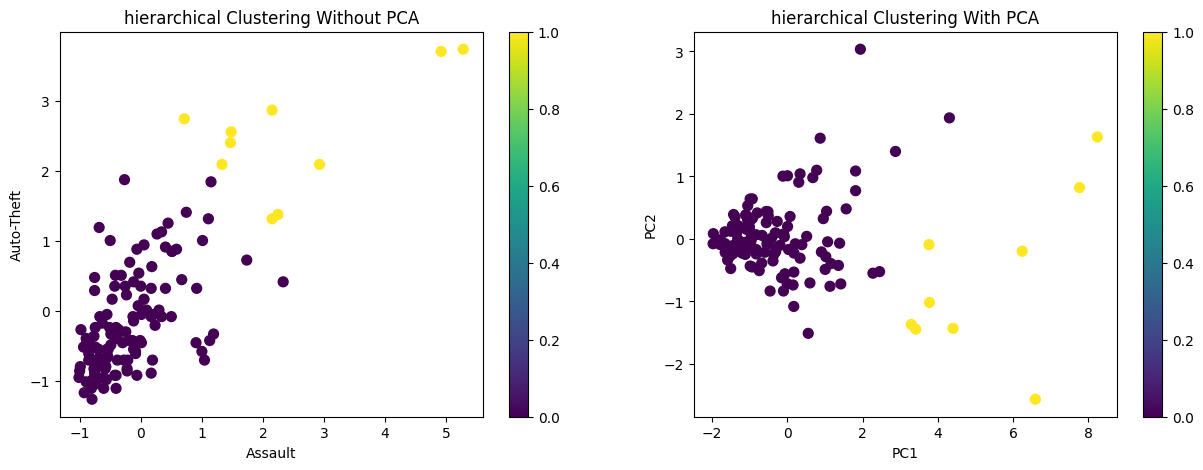

running time is : 0.0013190279999548693


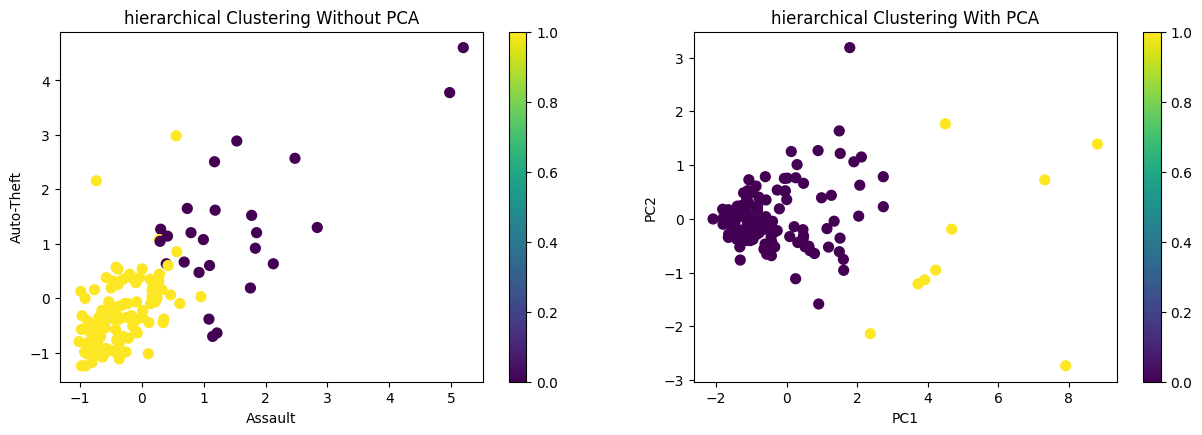

running time is : 0.0016304939999827184


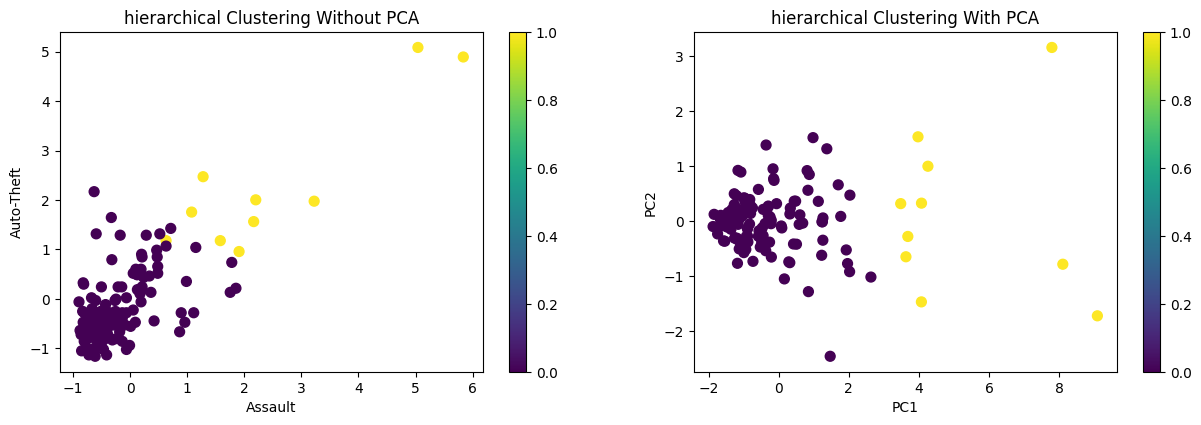

In [ ]:
#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 5))
ax = plt.subplot(121)
clustering = AgglomerativeClustering().fit(df_transformed0)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('hierarchical Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
clustering = AgglomerativeClustering().fit(X0)
stop = timeit.default_timer()
label0 = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X0)
df_result['label']=label0
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label0[0],s=50)
plt.title('hierarchical Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()



#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 10))
ax = plt.subplot(221)
clustering = AgglomerativeClustering().fit(df_transformed)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('hierarchical Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(222)
start = timeit.default_timer()
clustering = AgglomerativeClustering().fit(X)
stop = timeit.default_timer()
label1= pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X)
df_result['label']=label1
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label1[0],s=50)
plt.title('hierarchical Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 15))
ax = plt.subplot(321)
clustering = AgglomerativeClustering().fit(df_transformed2)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed2)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('hierarchical Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(322)
start = timeit.default_timer()
clustering = AgglomerativeClustering().fit(X1)
stop = timeit.default_timer()
label2 = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X1)
df_result['label']=label2
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label2[0],s=50)
plt.title('hierarchical Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()

In [ ]:
#Display Neighboorhoods
print('Crime Neighborhoods by K-Means in 2015')
print(neighborhoods0[np.where(label0[0]==1)])
kviolent15 = neighborhoods0[np.where(label0[0]==1)]
kviolent15s = neighborhoods0[np.where(label0[0]==0)]

print('Crime Neighborhoods by K-Means in 2016')
print(neighborhoods[np.where(label1[0]==1)])
kviolent16 = neighborhoods[np.where(label1[0]==1)]
kviolent16s = neighborhoods[np.where(label1[0]==0)]


print('Crime Neighborhoods by K-Means in 2017')
print(neighborhoods2[np.where(label2[0]==1)])
kviolent17 = neighborhoods2[np.where(label2[0]==1)]
kviolent17s = neighborhoods2[np.where(label2[0]==0)]

Crime Neighborhoods by K-Means in 2015
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Kensington-Chinatown (78)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']
Crime Neighborhoods by K-Means in 2016
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Moss Park (73)' 'South Riverdale (70)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'York University Heights (27)']
Crime Neighborhoods by K-Means in 2017
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Kensington-Chinatown (78)'
 'Moss Park (73)' 'Waterfront Communities-The Island (77)'
 'West Humber-Clairville (1)' 'Woburn (137)'
 'York University Heights (27)']


**Heirariechal CLustering Silhouette**

In [ ]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]
for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = AgglomerativeClustering(linkage='ward').fit(i)
    labels = clustering.labels_
    print("Silhouette score(Hierarchical) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

Silhouette score(Hierarchical) for year 2015 is 0.7033814036894885
Silhouette score(Hierarchical) for year 2016 is 0.7054095433919206
Silhouette score(Hierarchical) for year 2017 is 0.7124646269932864


In [ ]:
list(df_g.index)

['Agincourt North (129)',
 'Agincourt South-Malvern West (128)',
 'Alderwood (20)',
 'Annex (95)',
 'Banbury-Don Mills (42)',
 'Bathurst Manor (34)',
 'Bay Street Corridor (76)',
 'Bayview Village (52)',
 'Bedford Park-Nortown (39)',
 'Beechborough-Greenbrook (112)',
 'Bendale (127)',
 'Birchcliffe-Cliffside (122)',
 'Black Creek (24)',
 'Blake-Jones (69)',
 'Briar Hill-Belgravia (108)',
 'Bridle Path-Sunnybrook-York Mills (41)',
 'Broadview North (57)',
 'Cabbagetown-South St.James Town (71)',
 'Caledonia-Fairbank (109)',
 'Casa Loma (96)',
 'Centennial Scarborough (133)',
 'Church-Yonge Corridor (75)',
 'Clairlea-Birchmount (120)',
 'Clanton Park (33)',
 'Cliffcrest (123)',
 'Corso Italia-Davenport (92)',
 'Danforth (66)',
 'Danforth East York (59)',
 'Don Valley Village (47)',
 'Dorset Park (126)',
 'Dovercourt-Wallace Emerson-Junction (93)',
 'Downsview-Roding-CFB (26)',
 'Dufferin Grove (83)',
 'East End-Danforth (62)',
 'Edenbridge-Humber Valley (9)',
 'Eglinton East (138)',
 'En

In [ ]:
#Display Neighboorhoods
print('Crime Neighborhoods by Heirarchical in 2015')
print(neighborhoods0[np.where(label0[0]==1)])

print('Crime Neighborhoods by Heirarchical in 2016')
print(neighborhoods[np.where(label1[0]==1)])

print('Crime Neighborhoods by Heirarchical in 2017')
print(neighborhoods2[np.where(label2[0]==1)])

Crime Neighborhoods by Heirarchical in 2015
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Kensington-Chinatown (78)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']
Crime Neighborhoods by Heirarchical in 2016
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Moss Park (73)' 'South Riverdale (70)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'York University Heights (27)']
Crime Neighborhoods by Heirarchical in 2017
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Kensington-Chinatown (78)'
 'Moss Park (73)' 'Waterfront Communities-The Island (77)'
 'West Humber-Clairville (1)' 'Woburn (137)'
 'York University Heights (27)']


# Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

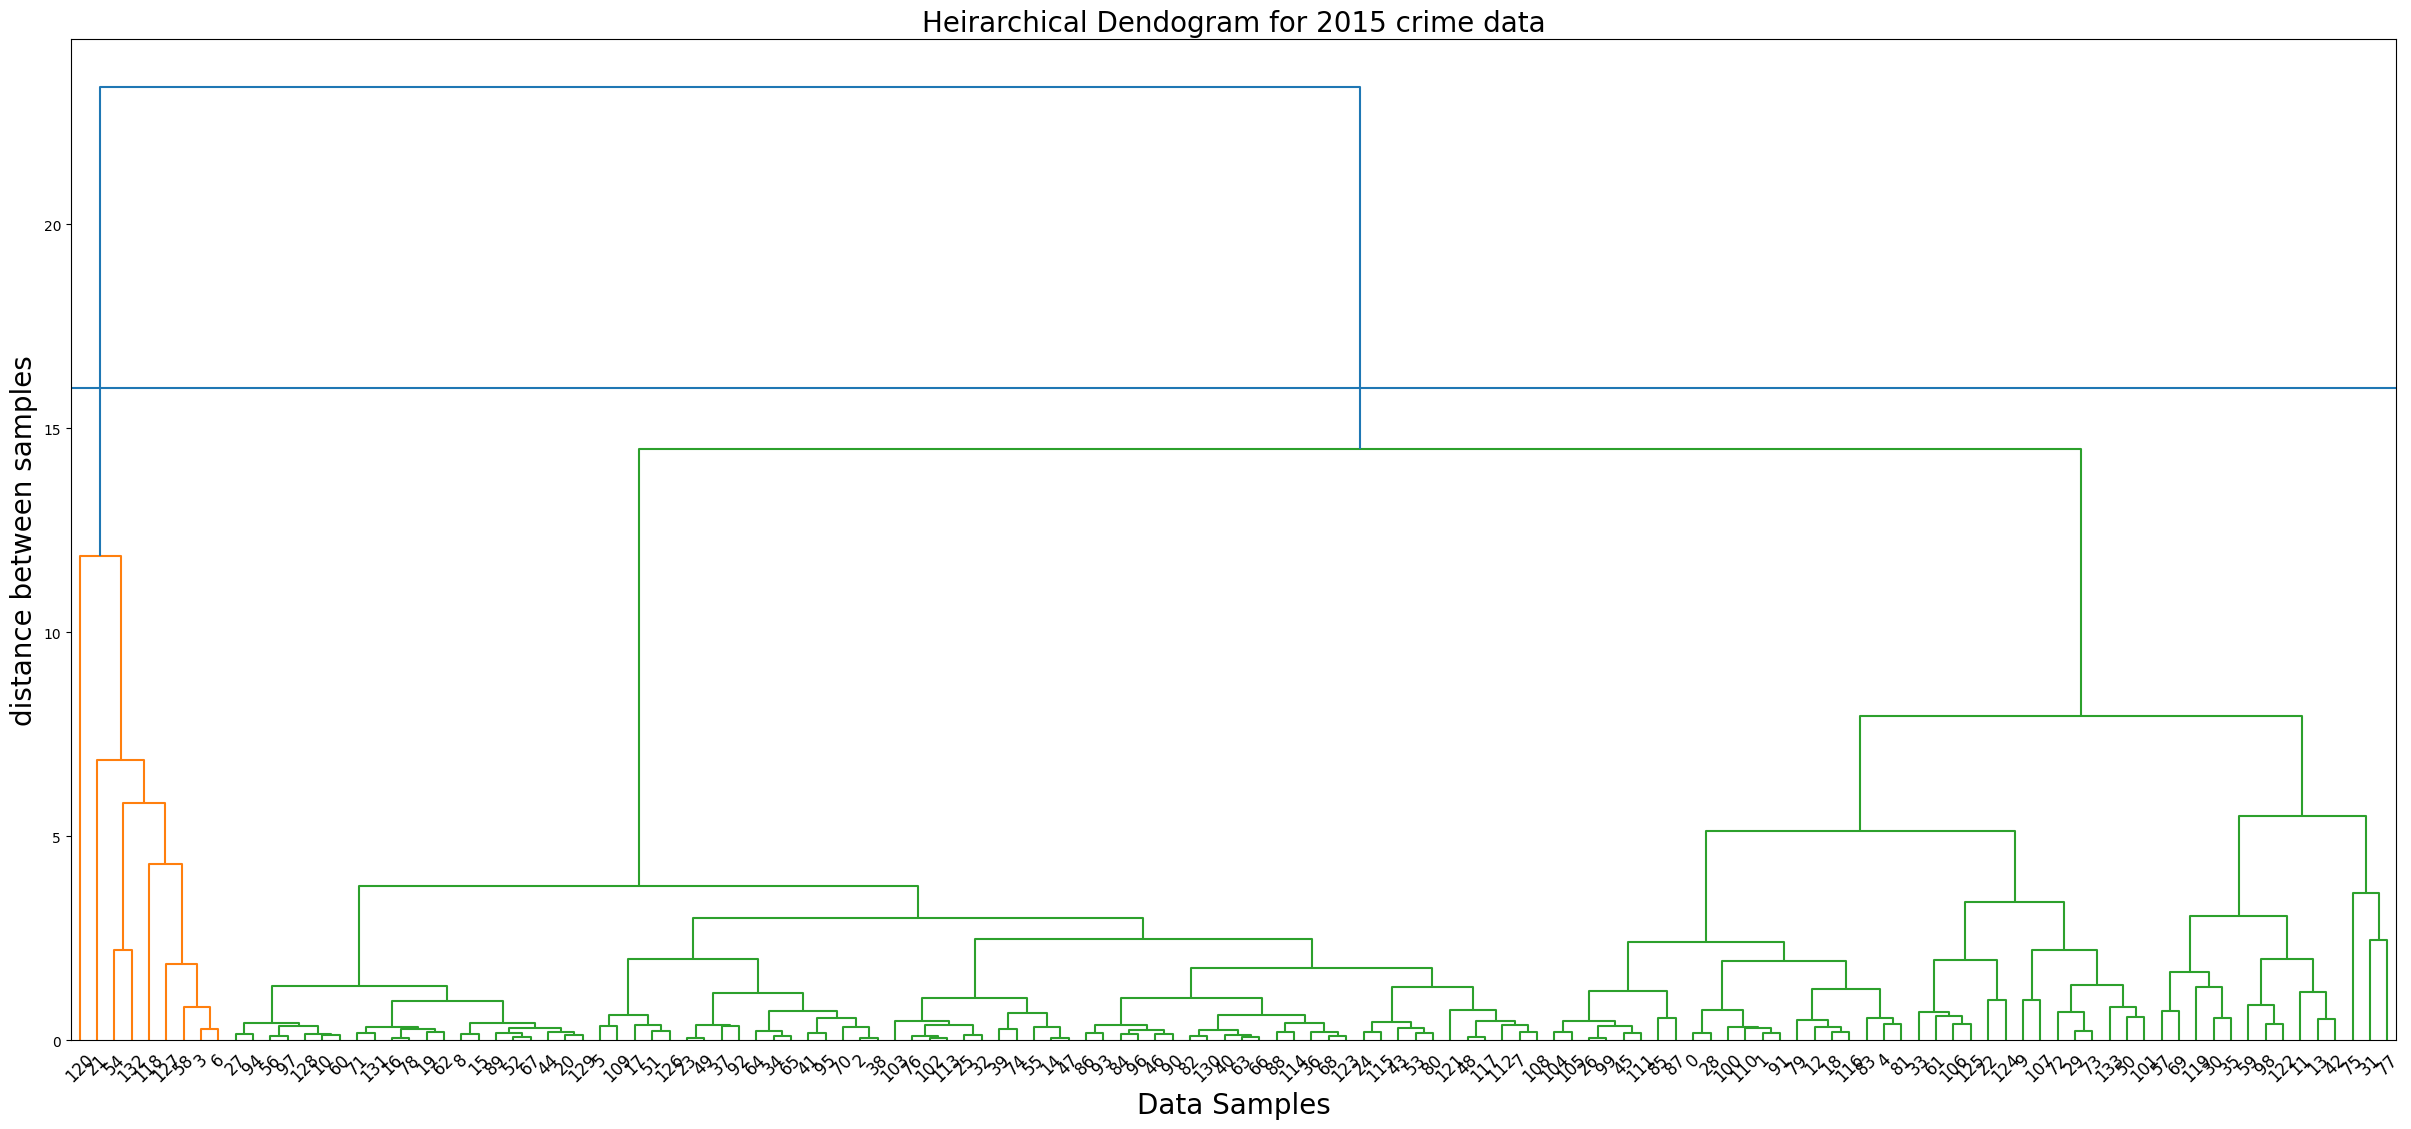

In [ ]:
Z = linkage(X0,'ward')
plt.figure(figsize=(30,13))
dendrogram(Z,show_contracted=True,leaf_rotation=45.,leaf_font_size=12.)
plt.title("Heirarchical Dendogram for 2015 crime data",fontsize=20)
plt.xlabel("Data Samples",fontsize=20)
#plt.xticks(np.arange(len(list(df_g2.index))),list(df_g2.index))
plt.ylabel("distance between samples",fontsize=20)
plt.axhline(y=16)
plt.show()

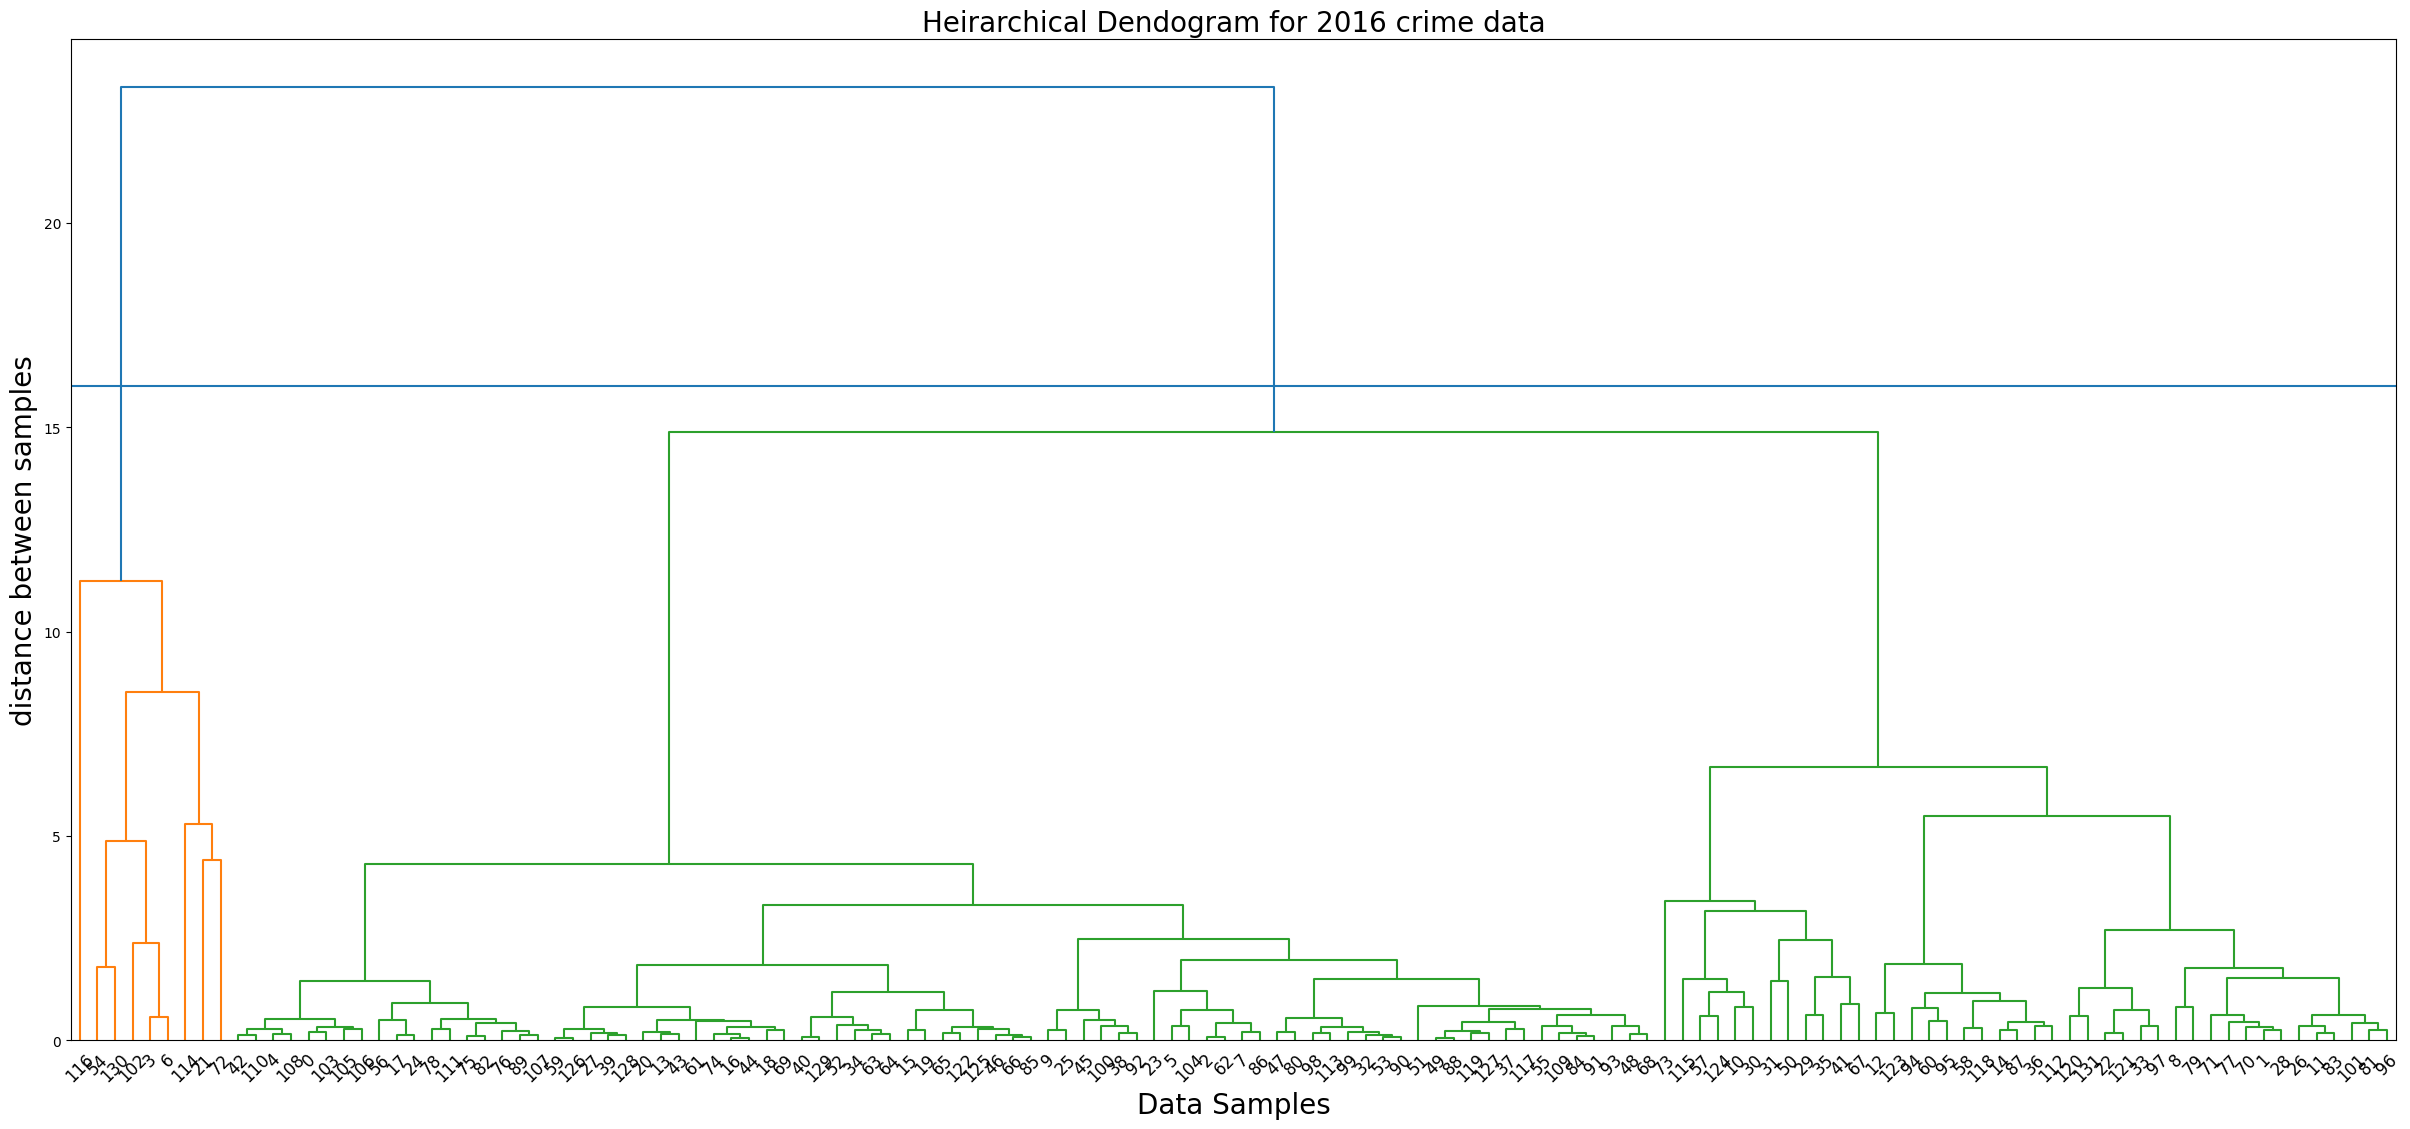

In [ ]:
Z = linkage(X,'ward')
plt.figure(figsize=(30,13))
dendrogram(Z,show_contracted=True,leaf_rotation=45.,leaf_font_size=12.)
plt.title("Heirarchical Dendogram for 2016 crime data",fontsize=20)
plt.xlabel("Data Samples",fontsize=20)
#plt.xticks(np.arange(len(list(df_g2.index))),list(df_g2.index))
plt.ylabel("distance between samples",fontsize=20)
plt.axhline(y=16)
plt.show()

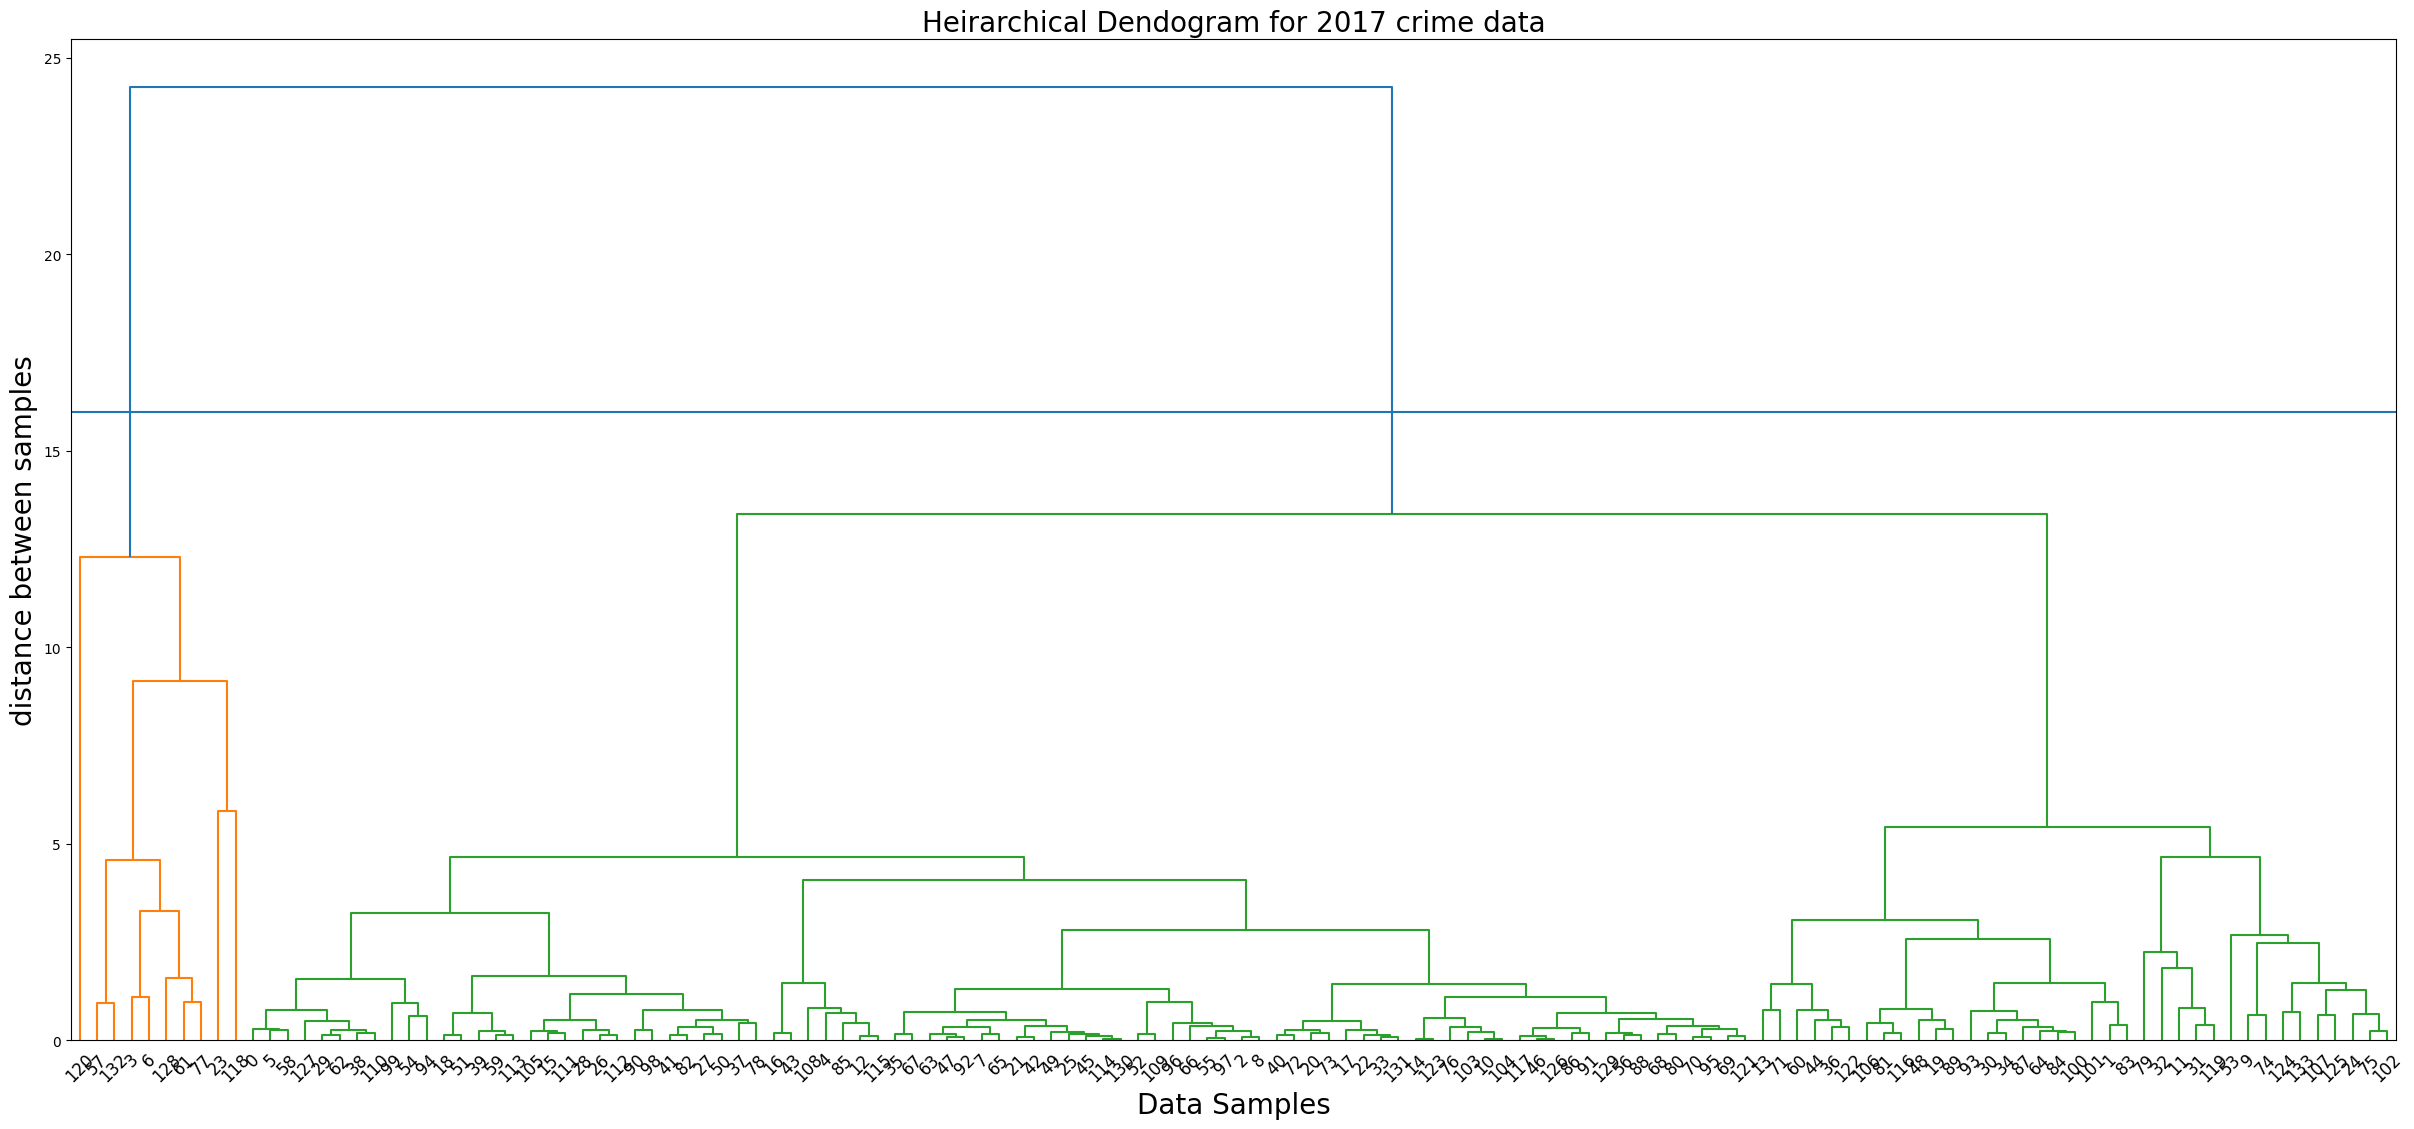

In [ ]:
Z = linkage(X1,'ward')
plt.figure(figsize=(30,13))
dendrogram(Z,show_contracted=True,leaf_rotation=45.,leaf_font_size=12.)
plt.title("Heirarchical Dendogram for 2017 crime data",fontsize=20)
plt.xlabel("Data Samples",fontsize=20)
#plt.xticks(np.arange(len(list(df_g2.index))),list(df_g2.index))
plt.ylabel("distance between samples",fontsize=20)
plt.axhline(y=16)
plt.show()

# BIRCH

In [ ]:
from sklearn.cluster import Birch

running time is : 0.0038077720000160298


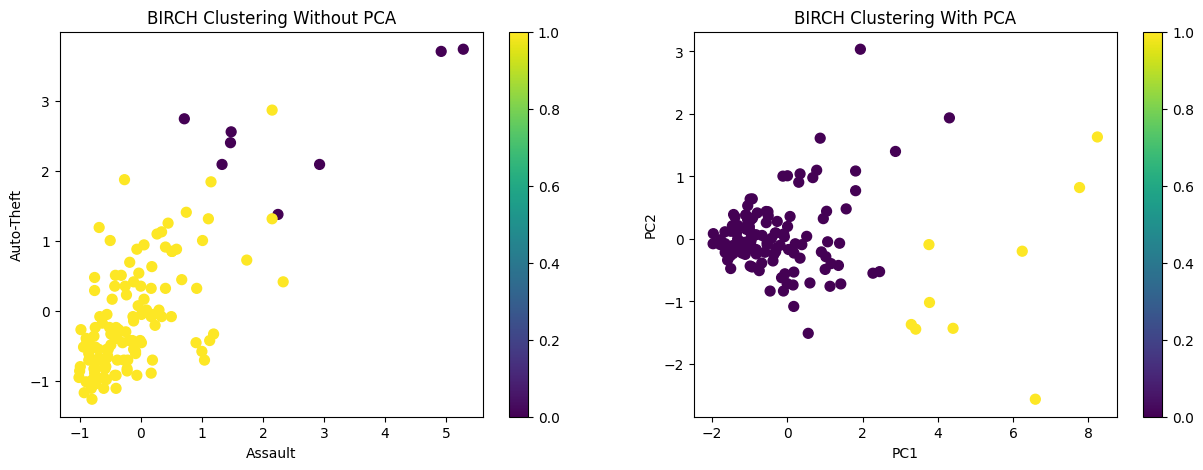

running time is : 0.004087024000000383


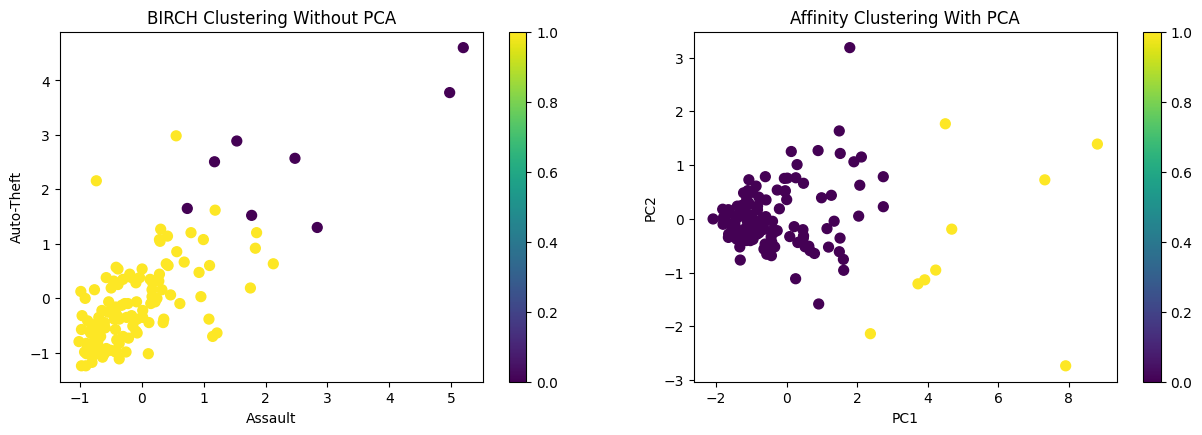

running time is : 0.003845518000048287


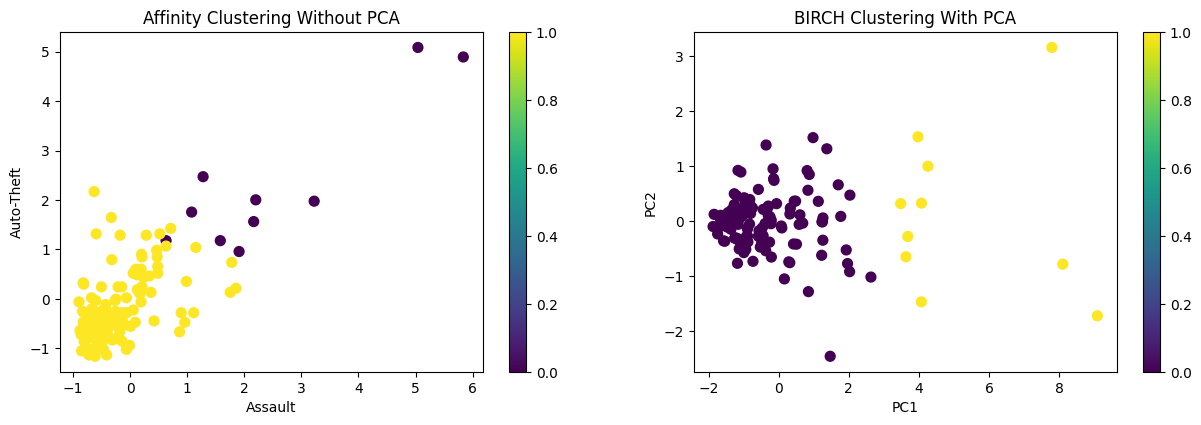

In [ ]:
#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 5))
ax = plt.subplot(121)
clustering = Birch(threshold=0.5,n_clusters=2).fit(df_transformed0)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed0)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('BIRCH Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(122)
start = timeit.default_timer()
clustering = Birch(threshold=0.5,n_clusters=2).fit(X0)
stop = timeit.default_timer()
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X0)
df_result['label']=label0
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label0[0],s=50)
plt.title('BIRCH Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()



#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 10))
ax = plt.subplot(221)
clustering = Birch(threshold=0.5,n_clusters=2).fit(df_transformed)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('BIRCH Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(222)
start = timeit.default_timer()
clustering = Birch(threshold=0.5,n_clusters=2).fit(X)
stop = timeit.default_timer()
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X)
df_result['label']=label1
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label1[0],s=50)
plt.title('Affinity Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()


#Plotting the cluster obtained using GMM
plt.figure(figsize=(15, 15))
ax = plt.subplot(321)
clustering = Birch(threshold=0.5,n_clusters=2).fit(df_transformed2)
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(df_transformed2)
df_result['label']=label
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
plt.title('Affinity Clustering Without PCA')
plt.xlabel('Assault')
plt.ylabel('Auto-Theft')
plt.colorbar(scatter)


ax = plt.subplot(322)
start = timeit.default_timer()
clustering = Birch(threshold=0.5,n_clusters=2).fit(X1)
stop = timeit.default_timer()
label = pd.DataFrame(clustering.labels_)
df_result =pd.DataFrame(X1)
df_result['label']=label2
scatter = plt.scatter(df_result[0],df_result[2],
                     c=label2[0],s=50)
plt.title('BIRCH Clustering With PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter)
print("running time is :",stop-start)
plt.show()

**Birch Silhouette Score**

In [ ]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]

for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = Birch(threshold=0.5,n_clusters=2).fit(i)
    labels = clustering.labels_
    print("Silhouette score(BIRCH) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

Silhouette score(BIRCH) for year 2015 is 0.6764266732850341
Silhouette score(BIRCH) for year 2016 is 0.7054095433919206
Silhouette score(BIRCH) for year 2017 is 0.7948635926046875


In [ ]:
#Display Neighboorhoods
print('Crime Neighborhoods by BIRCH in 2015')
print(neighborhoods0[np.where(label0[0]==1)])

print('Crime Neighborhoods by BIRCH in 2016')
print(neighborhoods[np.where(label1[0]==1)])


print('Crime Neighborhoods by BIRCH in 2017')
print(neighborhoods2[np.where(label2[0]==1)])

Crime Neighborhoods by BIRCH in 2015
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Kensington-Chinatown (78)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'Woburn (137)' 'York University Heights (27)']
Crime Neighborhoods by BIRCH in 2016
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Moss Park (73)' 'South Riverdale (70)'
 'Waterfront Communities-The Island (77)' 'West Humber-Clairville (1)'
 'York University Heights (27)']
Crime Neighborhoods by BIRCH in 2017
['Annex (95)' 'Bay Street Corridor (76)' 'Church-Yonge Corridor (75)'
 'Islington-City Centre West (14)' 'Kensington-Chinatown (78)'
 'Moss Park (73)' 'Waterfront Communities-The Island (77)'
 'West Humber-Clairville (1)' 'Woburn (137)'
 'York University Heights (27)']
